<img src="https://www.lebensmittelzeitung.net/news/media/23/Rossmann-Filiale-Berlin-224844-detailp.jpeg" alt="Image of Rossmann" style="width: 100%; height: auto; max-height: 320px;"/>

# Rossmann Store Sales Prediction

**Motivation**

Rossmann is one of the largest drug store chains in Europe, operating over 4,300 stores across 9 countries. Currently, Rossmann store managers are tasked with predicting their weekly sales for up to eight weeks in advance. Store sales are influenced by many factors, including promotions, competition, holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
<br>To improve this, a unified modeling method should be developed, enabling store managers to predict weekly sales more accurately. Standardizing the forecasting process offers several advantages. First, it ensures more consistent and reliable sales predictions, as all managers will use the same proven methods and data. Reliable sales forecasts in turn enable managers to make more informed and strategic decisions regarding inventory management, staffing, and promotional efforts. Additionally, a unified model allows for a better understanding of which factors impact sales the most. By analyzing the collected data, patterns and trends can be identified, providing valuable insights into the effectiveness of various strategies, whether it is special promotions, seasonal adjustments, or local factors. Based on these observations, strategic recommendations will be developed to optimize future sales.
<br>The next step involves providing the management team with comprehensive reports about the store performances. These reports will offer insights into the overall performance of all stores, as well as individual store performance.
<br>Overall, a unified forecasting model enhances the accuracy and consistency of sales predictions, provides insights into sales drivers, and supports strategic planning and optimization for both the management team and individual store managers, leading to improved efficiency and overall performance of Rossmann.

To conclude, the **objective** of the following data analysis is to:

- identify the key factors that drive sales performance and, based on these insights, 
- develop strategies to increase revenue growth
- generate a report containing information on the overall performance of the 1,115 stores, 
- generate reports containing information on the individual performance of each store
- develop a model to accurately forecast weekly sales for all stores

**Method**

The problem we are facing is a supervised machine learning problem. Specifically, it is a time series forecasting task for a continuous variable, which makes it a regression problem. 
<br>To evaluate the models, we have chosen several performance metrics:

- Root Mean Squared Error (RMSE): This metric is the square root of the Mean Squared Error (MSE). It brings the errors back to the same unit as the target variable, making the metric easily interpretable. Also, RMSE penalizes large errors more heavily, which aligns with our preference for minimizing significant deviations.
- R²: This metric measures the proportion of variance in the target variable that can be explained by the model. An R² value of 1 indicates perfect predictions, while a value of 0 suggests that the model's predictions are no better than using the mean of the observed values as an estimator.
- Adjusted R²: This metric is a modified version of R² that accounts for the number of independent variables used in the model. It is particularly useful when comparing models with different numbers of predictors, as it helps to reduce the risk of overfitting by penalizing models that include unnecessary predictors.




**Data**

The data used in this project is sourced from [Kaggle](https://www.kaggle.com/c/rossmann-store-sales/data) and consists of two datasets: `train.csv` and `store.csv`.

- The `train.csv` dataset contains 1,017,209 data points, collected from 1,115 Rossmann stores over 942 days, from January 1, 2013, to July 31, 2015. The dataset includes 7 numerical variables and 2 categorical variables.
- The `store.csv` dataset contains 1,115 data points, collected from 1,115 Rossmann stores. The dataset includes 6 numerical variables and 3 categorical variables.

The data provides historical sales records for 1,115 Rossmann stores and includes additional information on promotional campaigns, competition intensity, school holidays, public holidays, seasonal variations, and location conditions. A description of all features is as follows:*

- **Store** - a unique Id for each store
- **Sales** - the turnover for any given day _(target variable)_
- **DayOfWeek** - the day of the week on which the sales data was recorded: 1 = Monday, 2 = Tuesday, 3 = Wednesday, 4 = Thursday, 5 = Friday, 6 = Saturday, 7 = Sunday
- **Date** - the specific date on which the sales data was recorded
- **Customers** - the number of customers on a given day
- **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
- **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends: a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- **SchoolHoliday** - indicates if the store was affected by the closure of public schools
- **StoreType** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
- **CompetitionDistance** - distance in meters to the nearest competitor store
- **CompetitionOpenSinceMonth** - gives the approximate month of the time the nearest competitor was opened
- **CompetitionOpenSinceYear** - gives the approximate year of the time the nearest competitor was opened
- **Promo** - indicates whether a store is running a promo on that day
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **Promo2SinceWeek** - describes calendar week when the store started participating in Promo2
- **Promo2SinceYear** - describes the year when the store started participating in Promo2
- **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store



*It must be noted that some stores in the dataset were temporarily closed for refurbishment.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from statistics import mode
from math import sqrt
from IPython.display import display_html
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

C:\Users\leakl\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Overview

This chapter covers the following tasks:
- Importing csv files into dataframes

**Reading Data**

In [2]:
#read files and store them in dataframes
sales = pd.read_csv('data/train.csv')
store = pd.read_csv('data/store.csv')

sales.shape, store.shape

((1017209, 9), (1115, 10))

First, we have a look at both dataframes and the information they contain. The `sales` dataframe contains historical sales data of 1,115 Rossmann stores. The `store` dataframe provides additional information about these 1,115 Rossmann stores.

In [3]:
sales.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [4]:
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

## Data Preprocessing

This chapter covers the following tasks:
- Visualizing and managing missing values
- Modifying variable labels
- Data aggregation
- Merging dataframes into a single dataframe
- Handling wrong datatypes

**Duplicates & Missing Values**

First, we check for duplicates and missing values in the datasets. There are no duplicates, but there are a lot of missing values in the `store` dataset.

In [5]:
#check for duplicates
sales.duplicated().sum().any(), store.duplicated().sum().any()

(False, False)

In [6]:
#check for missing data
sales.isnull().sum().any(), store.isnull().sum().any()

(False, True)

In [7]:
print('Missing Data [%]:\n----------------------------------\n' + str(round(store.isnull().sum()/(len(store))*100,2)))

Missing Data [%]:
----------------------------------
Store                         0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.27
CompetitionOpenSinceMonth    31.75
CompetitionOpenSinceYear     31.75
Promo2                        0.00
Promo2SinceWeek              48.79
Promo2SinceYear              48.79
PromoInterval                48.79
dtype: float64


There are a few missing values for the variable _'CompetitionDistance'_. Nearly one-third of the data is missing for the variables _'CompetitionOpenSinceMonth'_ and _'CompetitionOpenSinceYear'_. Almost half of the data is missing for the variables _'Promo2SinceWeek'_ , _'Promo2SinceYear'_ and _'PromoInterval'_. <br> 
Given the substantial amount of missing data, simply deleting these data entries is not an option, as it would result in a significant loss of valuable information, which could negatively impact the accuracy and reliability of our analysis. Although deleting these specific columns is an option, we first need to determine through Exploratory Data Analysis (EDA) whether these variables significantly affect the target variable _'Sales'_. Therefore, our initial step is to find a suitable method to impute the missing values. <br> 
There are various strategies to handle missing data. However, before selecting an appropriate method, we need to understand the nature of the missing data. To achieve this, we will visualize the missing data to identify any patterns in their occurrence, which might indicate that the data is missing due to some specific conditions. Afterwards, we will analyze the distributions of the variables to determine which values might be suitable for imputing the missing data.

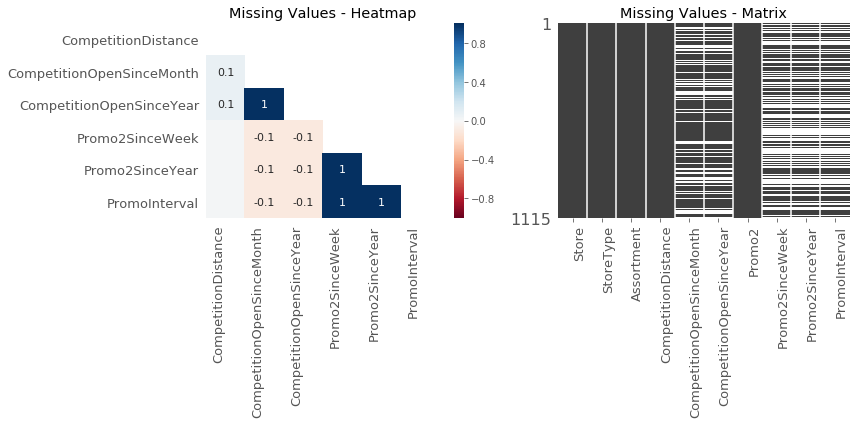

In [8]:
#visualize missing data 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

#heatmap
msno.heatmap(store, ax=axes[0], label_rotation=90, fontsize=13)
axes[0].set_title('Missing Values - Heatmap')
#matrix
msno.matrix(store, ax=axes[1], label_rotation=90, fontsize=13)
axes[1].set_title('Missing Values - Matrix')
axes[1].xaxis.tick_bottom()

plt.tight_layout()
plt.show()

We observe that _'CompetitionOpenSinceMonth'_ and _'CompetitionOpenSinceYear'_ are always missing together, as well as _'Promo2SinceWeek'_ , _'Promo2SinceYear'_ and _'PromoInterval'_. This makes sense as the variables capture similar information. However, it does not seem that there are any systematic patterns in the occurence of the missing data.

Next, we will look at the distributions of each variable individually to determine the most suitable values for imputing the missing data. We begin with the variable _'CompetitionDistance'_.

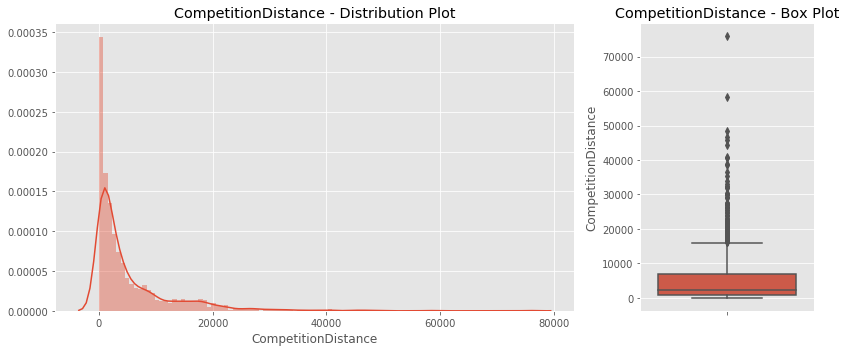

In [9]:
#plot variable 'CompetitionDistance': Distplot and Boxplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5), gridspec_kw={'width_ratios':[3, 1]})

#distplot
sns.distplot(store['CompetitionDistance'].dropna(), bins=100, kde=True, ax=axes[0])
axes[0].set_title('CompetitionDistance - Distribution Plot')
#boxplot
sns.boxplot(y=store['CompetitionDistance'].dropna(), ax=axes[1])
axes[1].set_title('CompetitionDistance - Box Plot')

plt.tight_layout()
plt.show()

Having a look at the distibution of _'CompetitionDistance'_ , we observe many outliers which also seem to make no sense. This is why we will not use the mean or median for imputation, as both of them are prone to outliers. Therefore, we decide to use the mode as imputation value, as it is less prone to the outliers in this case because each outlier individually does not occur freqeuently.

We proceed with the distributions of the variables _'CompetitionOpenSinceMonth'_ and _'CompetitionOpenSinceYear'_.

In [10]:
#we will use this function to visualize the variables' distributions

#this function plots a barplot for each variable in the list 'variables' of the dataframe 'df'
def barplot(df, variables):
    for var in variables:
        plt.figure(figsize=(12,3))
        values = store[var].value_counts().index
        counts = store[var].value_counts().values
        sns.barplot(x=values, y=counts)
        plt.title(f'{var} - Distribution')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

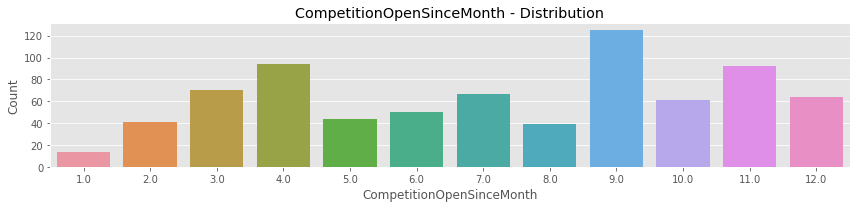

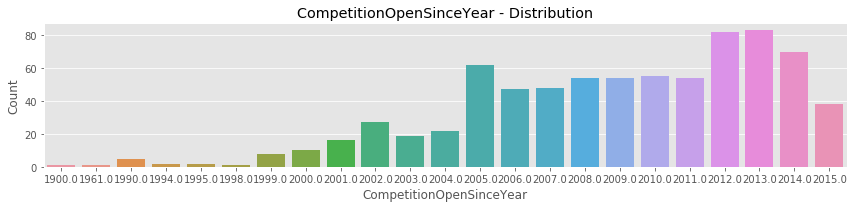

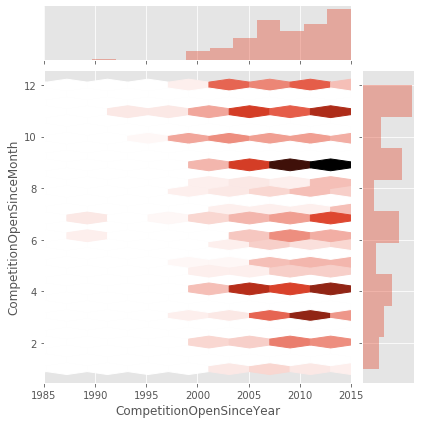

In [11]:
#plot distribution and jointplot of the variables 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear'
barplot(store, ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])
sns.jointplot(store['CompetitionOpenSinceYear'], store['CompetitionOpenSinceMonth'], kind='hex', xlim=(1985,2015))
plt.show()

According to the univariate distributions and the jointplot, most competitor stores opened in the years 2012-2014 and in month September. One approach to handle the missing values would be to impute the missing values for _'CompetitionOpenSinceYear'_ with the value '2013' and for _'CompetitionOpenSinceMonth'_ with '9' (September). However, this approach implies two significant concerns:

1. The distributions display occurrences of years and months independently, not in conjunction (year, month). Therefore, while 2013 and September (9) are individually frequent, they may not coincide frequently. We need to check this:

In [12]:
#create new dataframe with tuple (year,month) as column and count occurencies of each tuple 
competition_open = pd.DataFrame()
competition_open['OpenSince'] = [(year,month) for year, month in 
                                 zip(store['CompetitionOpenSinceYear'].dropna(), 
                                     store['CompetitionOpenSinceMonth'].dropna())]
#print 5 most frequent tuples
competition_open.value_counts()[:5]

OpenSince     
(2012.0, 9.0)     31
(2012.0, 11.0)    17
(2009.0, 9.0)     14
(2013.0, 4.0)     14
(2013.0, 9.0)     12
dtype: int64

We see that most competitor stores opened in September 2012. So our guess according to the plots were quite good. However, only 31 stores opened at this exact time, which brings us to the second concern:

2. The most frequent value observed (2012, 9) does not appear frequently enough to justify the assumption that it applies to the one-third missing data. Imputing such a large portion of the dataset with a single value would significantly distort its distribution, potentially introducing bias and reducing the variability in our dataset. This could lead to inaccurate model predictions and undermine the integrity of our analysis.

To preserve the original data distribution and maintain the integrity of our analysis, we decided to fill the missing values with value '0'. This approach allows us to acknowledge the uncertainty in the data without making unwarranted assumptions.

Lastly, we'll examine at the distributions of the variables _'Promo2SinceWeek'_ , _'Promo2SinceYear'_ and _'PromoInterval'_.

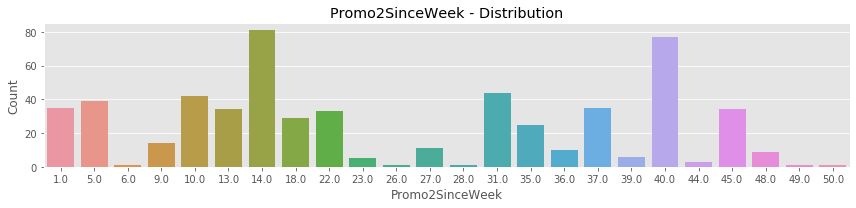

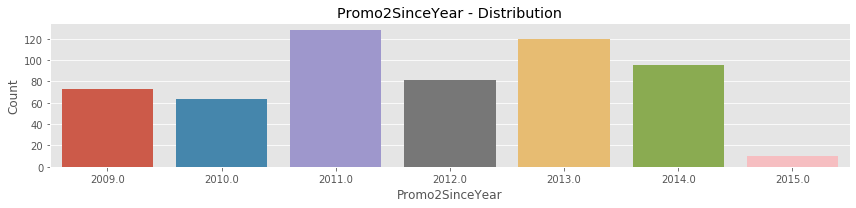

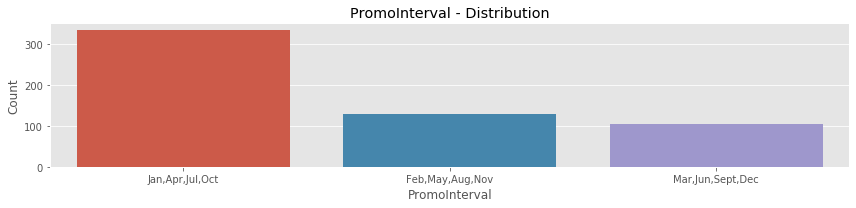

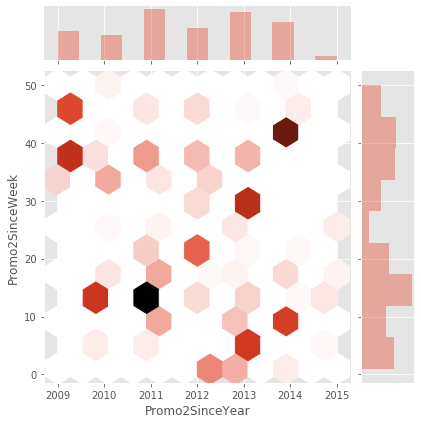

In [13]:
#plot distribution and jointplot of the variables 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval'
barplot(store, ['Promo2SinceWeek','Promo2SinceYear','PromoInterval'])
sns.jointplot(x='Promo2SinceYear', y ='Promo2SinceWeek', data=store, kind='hex')
plt.show()

Again, the distributions display occurrences of years and weeks independently, not in conjunction (year, week). We need to find out their occurences in conjunction:

In [14]:
#create new dataframe with tuple (year,week) as column and count occurencies of each tuple 
promo2_since = pd.DataFrame()
promo2_since['Promo2Since'] = [(year,week) for year, week in 
                               zip(store['Promo2SinceYear'].dropna(),
                                   store['Promo2SinceWeek'].dropna())]
#print 5 most frequent tuples
promo2_since.value_counts()[:5]

Promo2Since   
(2011.0, 14.0)    63
(2014.0, 40.0)    48
(2013.0, 31.0)    37
(2009.0, 37.0)    35
(2010.0, 13.0)    34
dtype: int64

We observe that most stores began participating in Promo2 in the 14th calendar week of 2011. Again, one approach to handle missing values would be to impute '2011' for _'Promo2SinceYear'_ and '14' for _'Promo2SinceWeek'_. However, for reasons previously discussed, we have decided against this approach and will fill the missing values with value '0' instead.<br>
We proceed in the exact same way for _'PromoInterval'_ : Most stores have the promo interval 'Jan, Apr, Jul, Oct', but we will fill the missing values with value 'n/a'. 

Finally, let's actually fill the missing values:

In [15]:
#fill missing values
for var in ['CompetitionOpenSinceYear','CompetitionOpenSinceMonth','Promo2SinceYear','Promo2SinceWeek']:
    store[var].fillna(value=0, inplace=True)
    
store['CompetitionDistance'].fillna(value=mode(store['CompetitionDistance']), inplace=True)
store['PromoInterval'].fillna(value='n/a', inplace=True)

**Update Labels of Variables**

For the next step, we decided to update the value labels for the variable _'Assortment'_ to enhance readability and understanding. For the same reasons, we decided to split the variable _'StateHoliday'_ into 3 separate variables: _'StateHoliday'_ , _'Easter'_ and _'Christmas'_.

In [16]:
#update value labels of variable 'Assortment'
store['Assortment'].replace(['a','b','c'], ['basic','extra','extended'], inplace=True)

#split 'StateHoliday' into three binary variables
sales['Easter'] = sales['StateHoliday'].apply(lambda x: 1 if x == 'b' else 0)
sales['Christmas'] = sales['StateHoliday'].apply(lambda x: 1 if x == 'c' else 0)
sales['StateHoliday'] = sales['StateHoliday'].apply(lambda x: 1 if x == 'a' else 0)

**Merging Dataframes & Data Aggregation**

Before merging the dataframes, we must convert the _'Date'_ column from a 'object' datatype to a 'datetime' datatype and set this column as the index. This is necessary, as we are dealing with time series data. 

In [17]:
#convert 'object' data type to 'datetime' data type and set 'Date' column as index
sales['Date'] = pd.to_datetime(sales['Date'])
sales.set_index('Date', inplace=True)
sales.index.name = None

As our goal is to forecast _weekly_ sales for each store, we are going to aggregate the sales data on a weekly basis and merge the two dataframes into a single dataframe using their common column _'Store'_.

In [18]:
#aggregate sales data on a weekly basis
weekly_sales_per_store = sales.groupby('Store').resample('W').sum().drop(['Store','DayOfWeek'], axis=1)
weekly_sales_per_store.index.names = ['Store','Date']

#merge the dataframes on the 'Store' column
weekly_sales = pd.merge(weekly_sales_per_store.reset_index(), store, on='Store', how='left')

#set 'Date' as new index
weekly_sales.set_index('Date', inplace=True)

**Handling wrong Datatypes**

In [19]:
weekly_sales.dtypes

Store                          int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
Easter                         int64
Christmas                      int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

We noticed that some variables (e.g. variables representing months, or calendar weeks) are floats, but should rather be integers. Thus, we convert these variables from float to integer.

In [20]:
#convert selected variables from float to integer
columns_to_convert = ['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                      'Promo2SinceWeek','Promo2SinceYear']
for col in columns_to_convert:
    weekly_sales[col] = weekly_sales[col].astype(int)

Finally, this is the dataframe we are working with for the following analysis:

In [21]:
weekly_sales

Store  Sales  Customers  Open  Promo  StateHoliday  SchoolHoliday  \
Date                                                                            
2013-01-06      1  19340       2500     4      0             1              6   
2013-01-13      1  32952       3918     6      5             0              5   
2013-01-20      1  25978       3417     6      0             0              0   
2013-01-27      1  33071       3862     6      5             0              0   
2013-02-03      1  28693       3561     6      0             0              0   
...           ...    ...        ...   ...    ...           ...            ...   
2015-07-05   1115  48130       2982     6      5             0              0   
2015-07-12   1115  36233       2531     6      0             0              0   
2015-07-19   1115  45927       3057     6      5             0              0   
2015-07-26   1115  35362       2504     6      0             0              0   
2015-08-02   1115  43551       2621     5      5             0              5   

            Easter  Christmas StoreType Assortment  CompetitionDistance  \
Date                                                                      
2013-01-06       0          0         c      basic                 1270   
2013-01-13       0          0         c      basic                 1270   
2013-01-20       0          0         c      basic                 1270   
2013-01-27       0          0         c      basic                 1270   
2013-02-03       0          0         c      basic                 1270   
...            ...        ...       ...        ...                  ...   
2015-07-05       0          0         d   extended                 5350   
2015-07-12       0          0         d   extended                 5350   
2015-07-19       0          0         d   extended                 5350   
2015-07-26       0          0         d   extended                 5350   
2015-08-02       0          0         d   extended                 5350   

            CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
Date                                                                      
2013-01-06                          9                      2008       0   
2013-01-13                          9                      2008       0   
2013-01-20                          9                      2008       0   
2013-01-27                          9                      2008       0   
2013-02-03                          9                      2008       0   
...                               ...                       ...     ...   
2015-07-05                          0                         0       1   
2015-07-12                          0                         0       1   
2015-07-19                          0                         0       1   
2015-07-26                          0                         0       1   
2015-08-02                          0                         0       1   

            Promo2SinceWeek  Promo2SinceYear     PromoInterval  
Date                                                            
2013-01-06                0                0               n/a  
2013-01-13                0                0               n/a  
2013-01-20                0                0               n/a  
2013-01-27                0                0               n/a  
2013-02-03                0                0               n/a  
...                     ...              ...               ...  
2015-07-05               22             2012  Mar,Jun,Sept,Dec  
2015-07-12               22             2012  Mar,Jun,Sept,Dec  
2015-07-19               22             2012  Mar,Jun,Sept,Dec  
2015-07-26               22             2012  Mar,Jun,Sept,Dec  
2015-08-02               22             2012  Mar,Jun,Sept,Dec  

[150525 rows x 18 columns]

## Exploratory Data Analysis

This chapter covers the following tasks:

- Descriptive Statistics
- Univariate Analysis
- Bivariate Analysis
- Identifying StoreType Characteristics
- Seasonality & Trends of weekly Sales
- Identifying Sales Driver
- Strategic Recommendations

**Descriptive Statistics** 

We start by having a look at the descriptive statistics of the data to get a first overview and to quickly highlight its key statistical properties.

In [22]:
weekly_sales.describe().apply(lambda x: round(x,2))

Store      Sales  Customers       Open      Promo  StateHoliday  \
count  150525.00  150525.00  150525.00  150525.00  150525.00     150525.00   
mean      558.00   39017.97    4278.64       5.61       2.58          0.13   
std       321.87   17797.51    2434.03       1.14       2.50          0.35   
min         1.00       0.00       0.00       0.00       0.00          0.00   
25%       279.00   28259.00    2983.00       6.00       0.00          0.00   
50%       558.00   36799.00    3835.00       6.00       5.00          0.00   
75%       837.00   47259.00    5023.00       6.00       5.00          0.00   
max      1115.00  195930.00   30188.00       7.00       5.00          2.00   

       SchoolHoliday     Easter  Christmas  CompetitionDistance  \
count      150525.00  150525.00  150525.00            150525.00   
mean            1.21       0.04       0.03              5391.03   
std             2.12       0.21       0.23              7654.10   
min             0.00       0.00       0.00                20.00   
25%             0.00       0.00       0.00               710.00   
50%             0.00       0.00       0.00              2320.00   
75%             1.00       0.00       0.00              6880.00   
max             7.00       1.00       2.00             75860.00   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear     Promo2  \
count                  150525.00                 150525.00  150525.00   
mean                        4.93                   1370.94       0.51   
std                         4.28                    935.05       0.50   
min                         0.00                      0.00       0.00   
25%                         0.00                      0.00       0.00   
50%                         4.00                   2006.00       1.00   
75%                         9.00                   2011.00       1.00   
max                        12.00                   2015.00       1.00   

       Promo2SinceWeek  Promo2SinceYear  
count        150525.00        150525.00  
mean             12.08          1030.24  
std              15.54          1005.59  
min               0.00             0.00  
25%               0.00             0.00  
50%               1.00          2009.00  
75%              22.00          2012.00  
max              50.00          2015.00

We notice the following aspects:*

- The distributions of _'Sales'_ and _'Customers'_ have a great variance, with sales having a mean of about 39,000 and customers averaging around 4,300.
- Stores were mostly _'Open'_ 6 days a week.
- Mostly, _'Promo'_ is taking place 5 days a week. 
- Most days are no _'SchoolHoliday'_ or _'StateHoliday'_ (including _'Christmas'_ and  _'Easter'_ ).
- _'CompetitionDistance'_ has a large range and high variability.
- Half of the stores participate in _'Promo2'_ and the other half doesn't.  
- The remaining variables _'CompetitionOpenSinceMonth'_ , _'CompetitionOpenSinceYear'_ , _'Promo2SinceWeek'_ and _'Promo2SinceYear'_ are difficult to interpret, as 30% - 50% of the data was filled with zeros, which distorted the means and other summary statistics.

<br>
* keep in mind that some stores were closed due to refurbishment

### Univariate Analysis

Next, we look at the distributions of each variable individually to understand its basic characteristics, potentially identifying patterns and outliers. To make the feature visualzation easier, we separate the variables into numerical and categorical variables and create some functions to visualize their distributions.

In [23]:
#select numerical and categorical variables
num_vars = ['Sales','Customers','CompetitionDistance']
cat_vars = ['Open','Promo','SchoolHoliday','StateHoliday','Christmas','Easter',
            'StoreType','Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
            'Promo2SinceWeek','Promo2SinceYear','Promo2','PromoInterval']

In [24]:
#define functions to visualize distributions of numerical and categorical variables

#UNIVARIATE ANALYSIS

#this function plots a distplot for each numerical variable in the list 'num_vars' of dataframe 'df'
def distribution_num(df, num_vars):
    #create subplot
    n_vars = len(num_vars)
    rows = (n_vars//3)+1
    fig, axes = plt.subplots(nrows=rows, ncols=3)    
    axes = axes.flatten()         
    fig.set_size_inches(12,6)
    
    #create distpplot for each variable
    for ax, var in zip(axes, num_vars):
        sns.distplot(df[var], ax=ax)
        ax.set_title(f'{var} - Distribution')
          
    #delete excess axis
    for i in range(len(num_vars), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout() 
    plt.show()

    
#this function plots a boxplot for each numerical variable in the list 'num_vars' of dataframe 'df'
def boxplot_num(df, num_vars):
    #create subplot
    n_vars = len(num_vars)
    rows = (n_vars//3)+1
    fig, axes = plt.subplots(nrows=rows, ncols=3)   
    axes = axes.flatten()         
    fig.set_size_inches(12,8)
    
    #create distplot for each variable
    for ax, var in zip(axes, num_vars):
        sns.boxplot(df[var], ax=ax, orient='v')
        ax.set_title(f'{var} - Boxplot')
        
    #delete excess axis
    for i in range(len(num_vars), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

        
#this function plots a barplot for each categorical variable in the list 'cat_vars' of dataframe 'df'
def distribution_cat(df, cat_vars):
    #create subplot
    n_vars = len(cat_vars)
    rows = (n_vars//2) + 1
    fig, axes = plt.subplots(nrows=rows, ncols=2)
    axes = axes.flatten()
    fig.set_size_inches(15,30)

    #create barplot for each variable
    for ax, var in zip(axes, cat_vars):
        values = df[var].value_counts().index
        counts = df[var].value_counts().values
        sns.barplot(x=values, y=counts, ax=ax)      
        ax.set_title(f'{var} - Distribution')
        ax.set_xlabel(var)
        ax.set_ylabel('Count')
        if len(values) >= 15:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
            
    #delete excess axis
    for i in range(len(cat_vars), len(axes)):
        fig.delaxes(axes[i])
    plt.subplots_adjust(hspace=0.6, wspace=0.2)
    plt.show()
        
        
#BIVARIATE ANALYSIS

#this function plots a barplot 'Sales' vs. var and a scatterplot 'Sales' vs. 'Customers' with hue=var for
#the categorical variable of dataframe 'df'
def bar_scatter(df, cat_var):  
    #create subplot
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    
    #barplot
    sns.barplot(ax=axes[0], x=cat_var, y='Sales', data=df)
    axes[0].set_xlabel(cat_var)
    axes[0].set_ylabel('Sales')
    axes[0].set_title(f'Sales vs. {cat_var}')
    
    #scatterplot
    sns.scatterplot(ax=axes[1], x='Customers', y='Sales', hue=cat_var, data=df, s=12)
    axes[1].set_xlabel('Customers')
    axes[1].set_ylabel('Sales')
    axes[1].set_title(f'Sales vs. Customers by {cat_var}')
    
    plt.tight_layout()
    plt.show()

**Numerical Variables**

We start with the distributions of the three numerical variables _'Sales'_ , _'Customers'_ and _'CompetitionDistance'_.

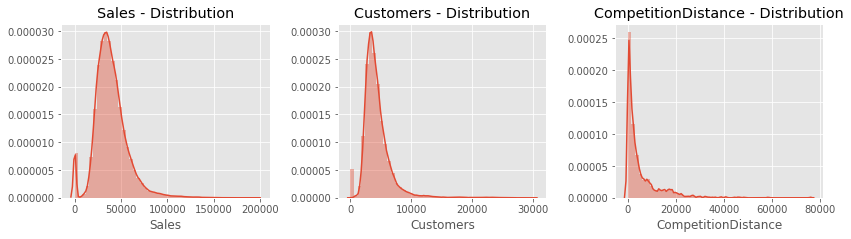

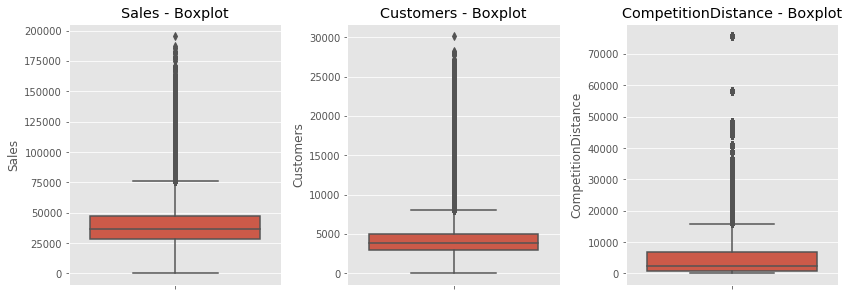

In [25]:
#plot distributions of the variables 'Sales', 'Customers' and 'CompetitionDistance'
distribution_num(weekly_sales, num_vars) 
boxplot_num(weekly_sales, num_vars)

Results:

- The distributions of the numerical variables indicate that all variables are right-skewed
- Boxplots reveal lots of outliers across the variables
- Weekly sales are mostly around 40,000
- Weekly customers are mostly around 3,000
- Zero values in the Sales and Customers data occur due to store closures on Sundays, holidays, and during refurbishment periods
- Most competitor stores are near to the Rossmann stores

&#8594;  We must address the outliers and consider data transformation to correct for skewness.

<br>

**Categorical Variables**

Now, we will visualize the distributions of the categorical variables.

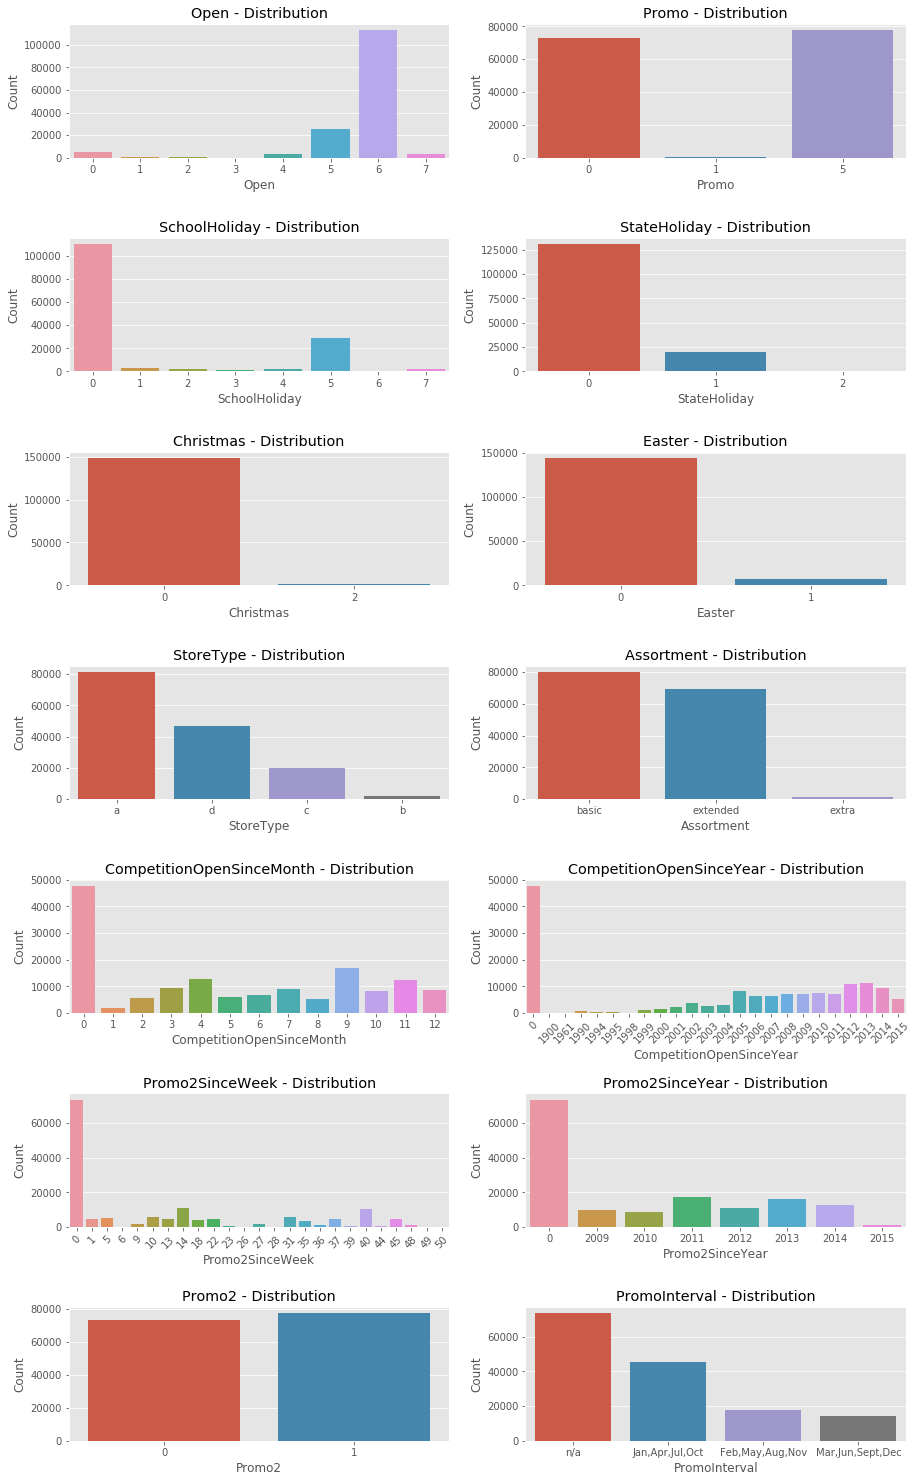

In [26]:
distribution_cat(weekly_sales, cat_vars)

Results:

- Most stores are open 6 out of 7 days a week.
- Promotional events take place five days a week or none at all, with almost equal occurrence.
- Usually, there is no school holiday, but when there is, it's typically 5 days a week.
- Most often, there is no state holidays/christmas/easter, but when there is, it's only 1-2 days a week.
- The most common store type is type 'a', followed by 'd', 'c', and 'b' (although we don't know what characterizes them).
- Most stores offer a basic, then extended, very few an extra assortment.
- Competing stores typically opened in September, April or November.
- Competing stores typically opened in the last years rather than a long time ago.
- Most stores began participating in Promo2 in calendar week 14.
- Most stores began participating in Promo2 in 2011 and 2013.
- Roughly half of the stores participate in Promo2, the other half doesn't.
- The most common promo interval is 'Jan, Apr, Jul, Oct', with other intervals almost evenly distributed.


Having a closer look at the amount of stores that participate in _'Promo2'_ , we observe that almost half of the stores are not participating. Interestingly, this proportion is quite similar to the proportion of missing values found in the variables _'Promo2SinceYear'_ , _'Promo2SinceWeek'_ , and _'PromoInterval'_. Let's check whether the stores with missing data are the same stores that do not participate in _'Promo2'_.

In [27]:
#check values for variable 'Promo2SinceYear' for stores not participating in 'Promo2'
no_promo = weekly_sales.query('Promo2 == 0')
no_promo['Promo2SinceYear'].value_counts()

0    73440
Name: Promo2SinceYear, dtype: int64

Indeed, this is the case as for stores not participating in _'Promo2'_ , there is only '0' in the data. With this new information, we are going to replace 'n/a' for the variable _'PromoInterval'_ with the value 'noPromo2', to show that the data is not missing but rather signifying another type of information.

In [28]:
#change labels
weekly_sales['PromoInterval'].replace('n/a', 'noPromo2', inplace=True)

### Bivariate Analysis

In the next step we want to examine the relationship between the variables and the target variable _'Sales'_. This step is important for identifying key sales drivers and gaining insights into which features might play an important role for the prediction model.

<br>

**Numeric Variables**

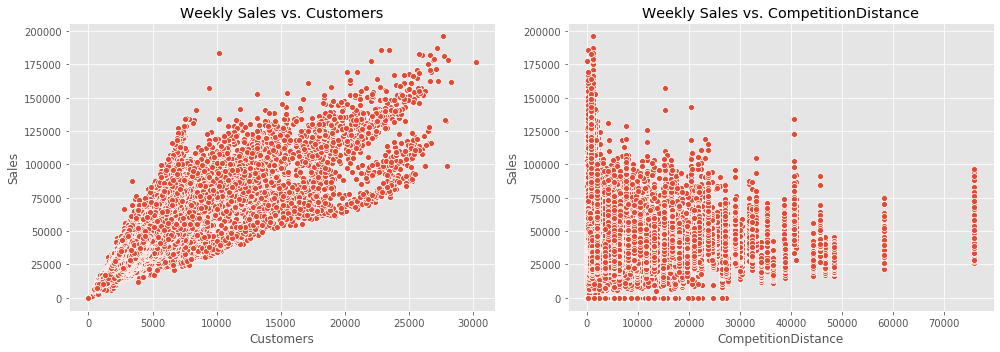

In [29]:
#visualize variables 'Sales' vs. 'Customers'/'CompetitionDistance' in scatterplot

#create subplot
fig, axes = plt.subplots(nrows=1, ncols=2)    
axes = axes.flatten()         
fig.set_size_inches(14,5)

#plot 'Sales' vs. 'Customers'
sns.scatterplot(x='Customers', y='Sales', data=weekly_sales, ax=axes[0])
axes[0].set_title('Weekly Sales vs. Customers')

#plot 'Sales' vs. 'CompetitionDistance'
sns.scatterplot(x='CompetitionDistance', y='Sales', data=weekly_sales, ax=axes[1])
axes[1].set_title('Weekly Sales vs. CompetitionDistance')

plt.tight_layout()
plt.show()

Results: 

- Sales and Customers are positively correlated.
- Surprisingly, Rossmann stores with competitor stores near them have higher sales.

<br>

**Categorical Variables**

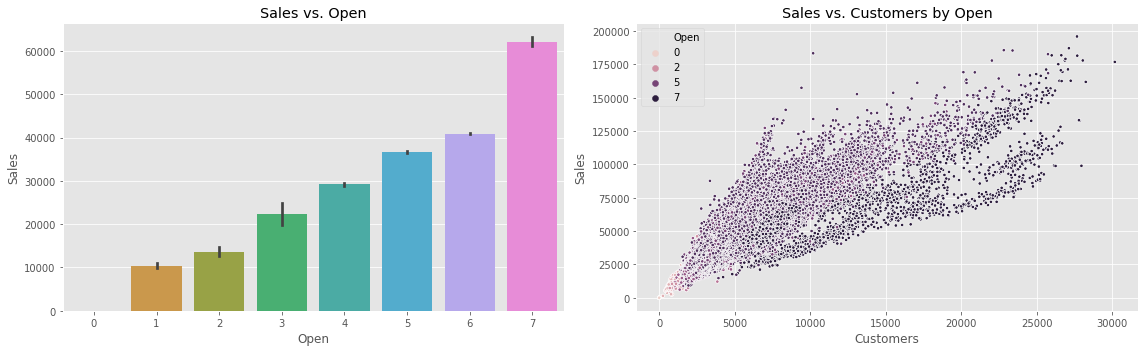

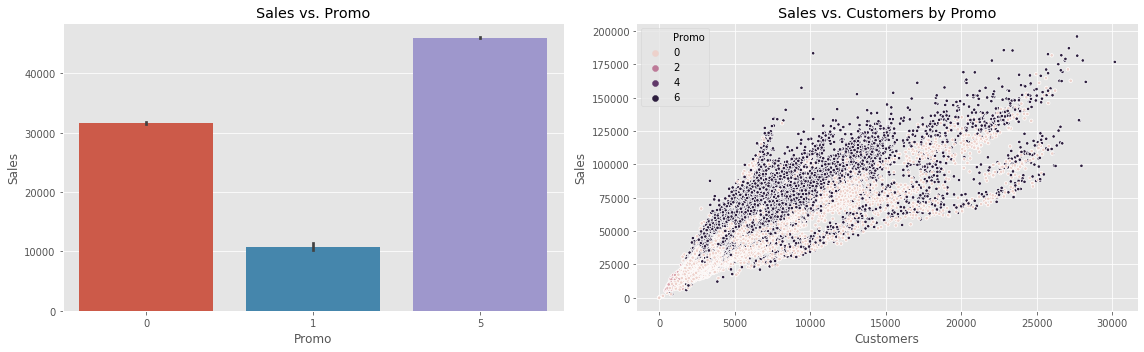

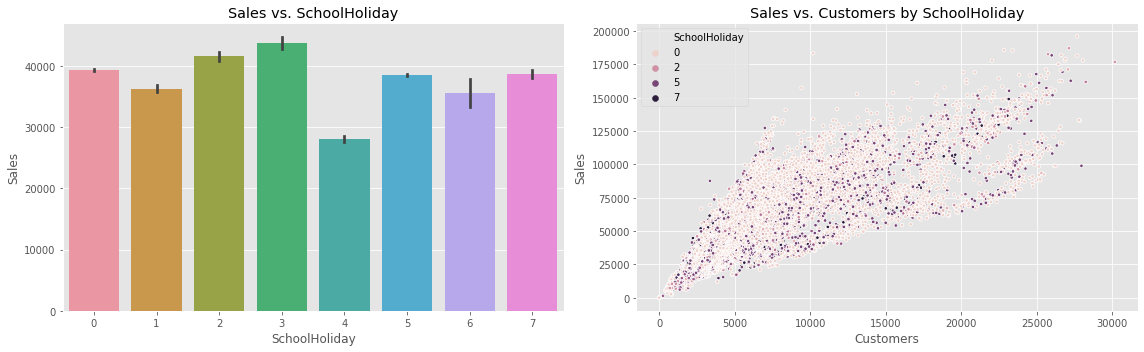

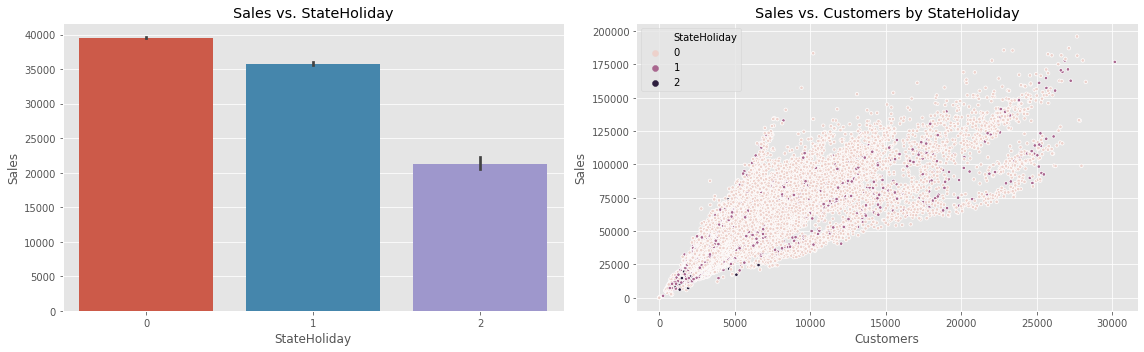

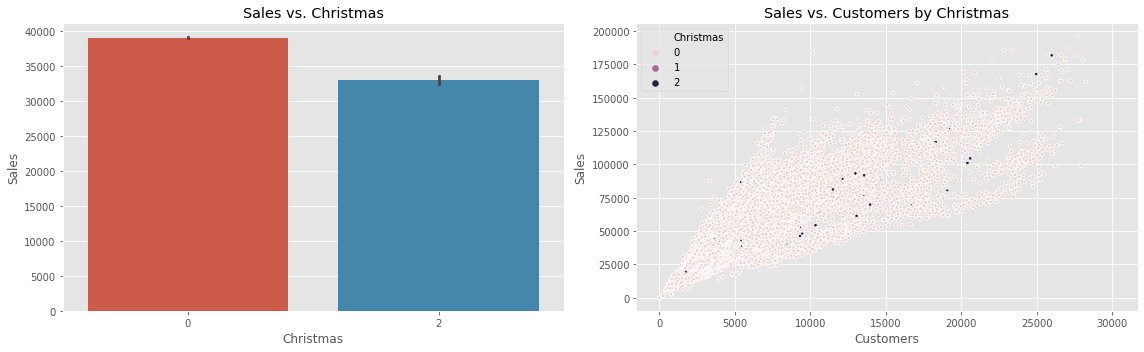

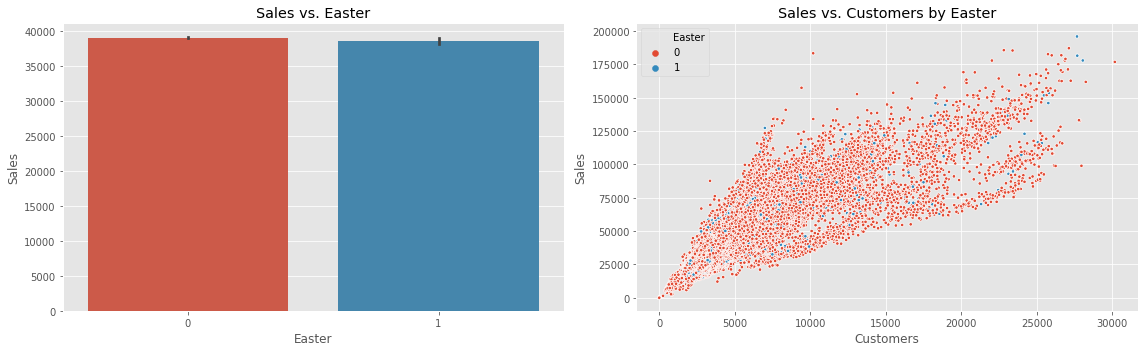

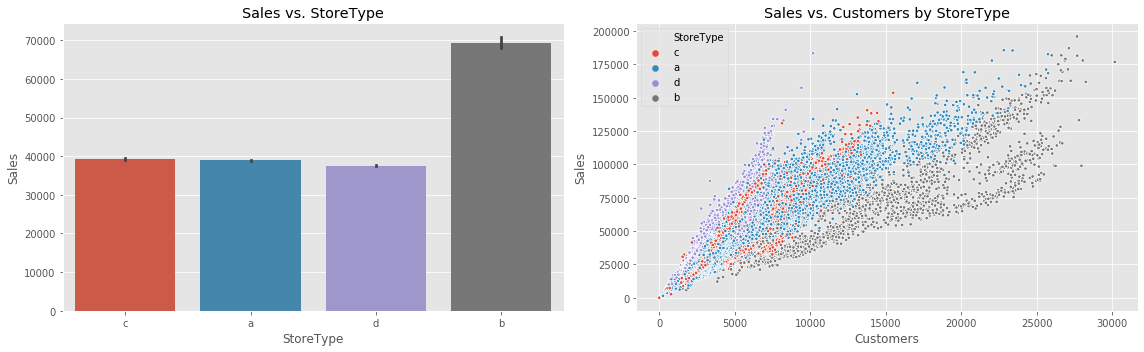

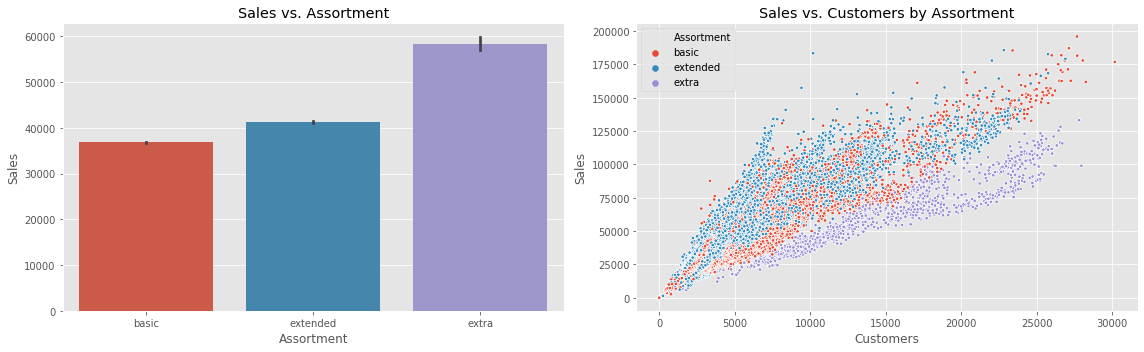

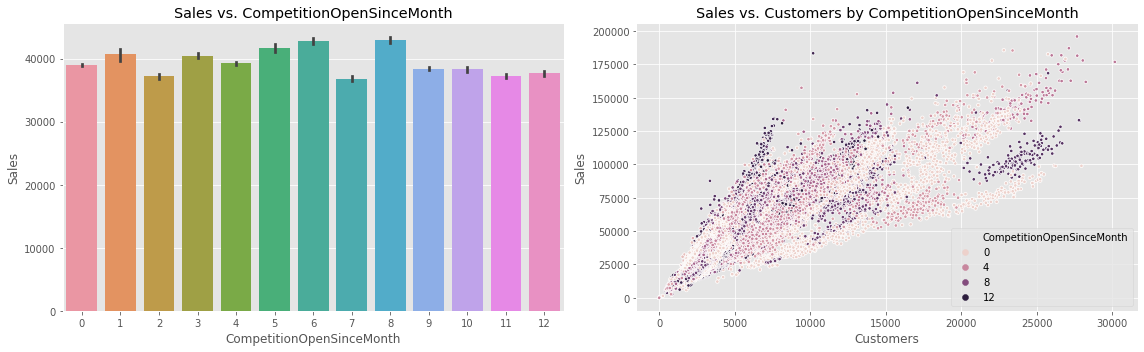

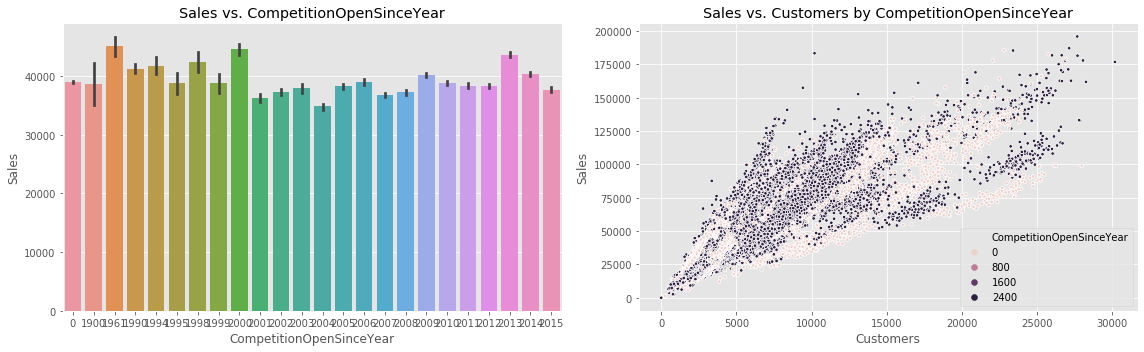

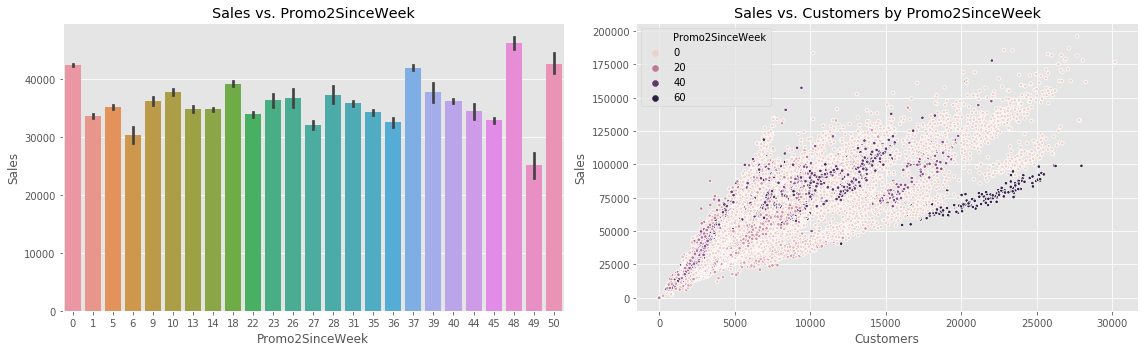

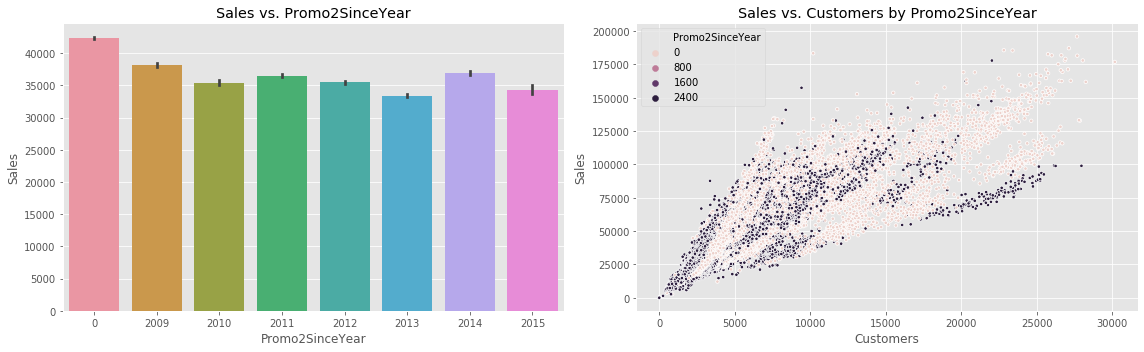

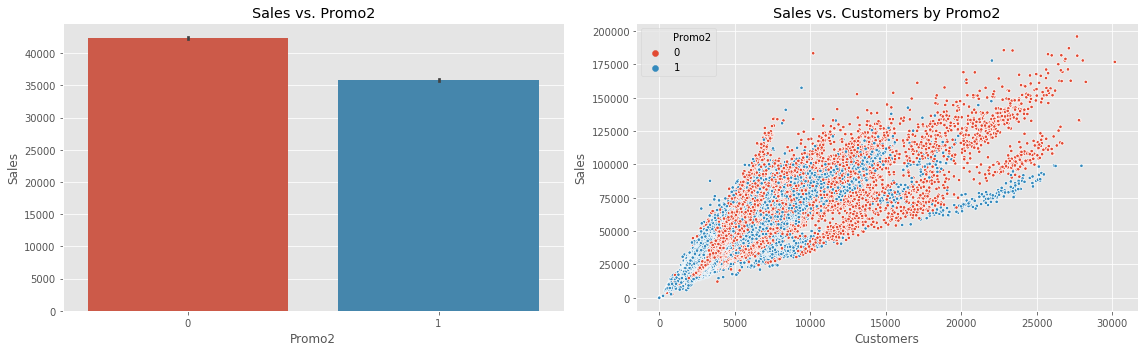

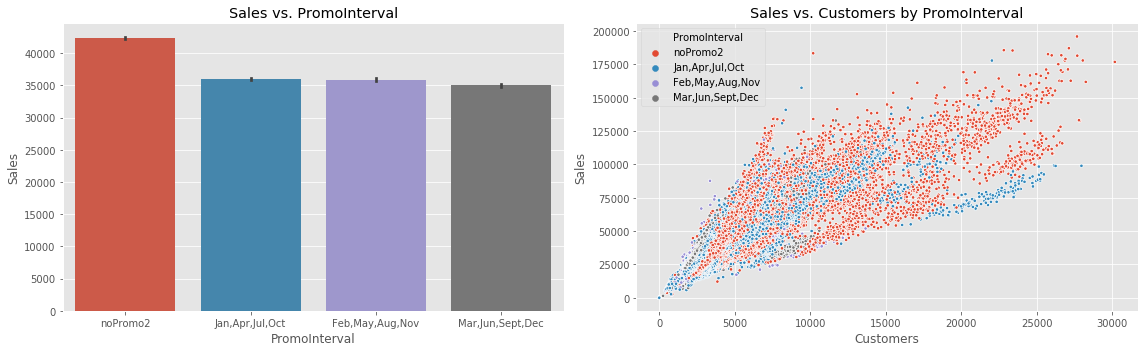

In [30]:
#plot barplot 'Sales' vs. var and scatterplot 'Sales' vs. 'Customers' with hue=var for all var in categorical variables
for var in cat_vars:
    bar_scatter(weekly_sales, var)

Results: 

- The more frequent a store is open, the higher are its sales.
- More promo days lead to higher sales.
- School holidays appear to have no impact on sales, likely because stores remain open.
- State holidays seem to decrease sales.
- Christmas seems to decrease sales, although some of the highest sales are during Christmas.
- Easter seems to have no impact on sales.
- Store type 'b' attracts many customers and generate high sales. Store types 'a', 'c' and 'd' have less customers and lower sales.
- Stores with extra assortment have higher sales than stores with extended or basic assortment.
- The opening date of competitor stores seems to not affect sales.
- The date a store started participating in Promo2 seems not to impact sales.
- Stores not participating in Promo2 have slightly higher sales and more customers.
- Promo Interval seems to have no impact on sales.

<br>

**Intercorrelations**

Let's delve into the pairwise correlations between all variables in more detail. Therefore, we will first create dummy variables for the categorical variables. Then, we will calculate and visualize the correlation matrix, which allows us to better understand the relationships between the variables such as dependencies and interactions.

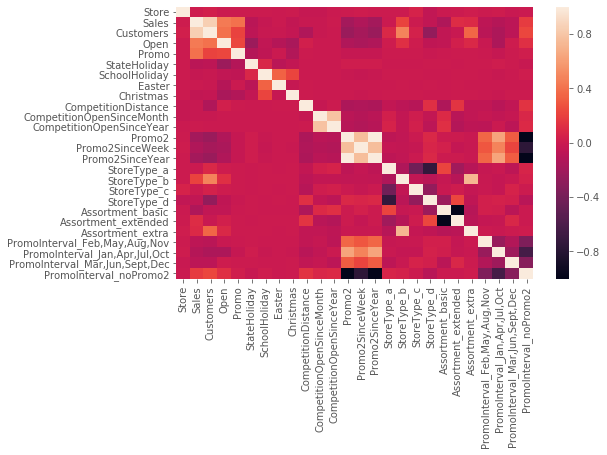

In [31]:
#create dummy df and compute pairwise correlations
weekly_sales_dummies = pd.get_dummies(weekly_sales, columns=['StoreType','Assortment','PromoInterval'])
corr_matrix = weekly_sales_dummies.corr()
#visualize correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix)
plt.show()

In [32]:
#this function stores all correlations that are higher than a certain threshold in a dataframe
def highest_correlations(corr_matrix, threshold):
    all_feature1 = []
    all_feature2 = []
    correlations = []
    #iterate through each pair of features (upper triangle of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            correlation = round(corr_matrix.loc[feature1, feature2],2)
        
            #only correlations above threshold are stored
            if abs(correlation) >= threshold:
                all_feature1.append(feature1)
                all_feature2.append(feature2)
                correlations.append(correlation)
                
    high_correlations = pd.DataFrame({'Feature 1': all_feature1, 'Feature2': all_feature2, 'Correlation': correlations})
    
    return high_correlations.sort_values(by='Correlation', ascending=False)

In [33]:
#get correlations >0.8
highest_correlations(corr_matrix, threshold=0.8)

Feature 1                Feature2  Correlation
1            Promo2         Promo2SinceYear         1.00
0             Sales               Customers         0.85
4  Assortment_basic     Assortment_extended        -0.98
2            Promo2  PromoInterval_noPromo2        -1.00
3   Promo2SinceYear  PromoInterval_noPromo2        -1.00

Results:

- _'Sales'_ and _'Customers'_ decrease and increase together.
- Stores with a 'basic' assortment are unlikely to have an 'extended' assortment.
- The strong positive correlation between _'Promo2'_ and _'Promo2SinceYear'_ makes sense: _'Promo2SinceYear'_ is set to 0 when _'Promo2'_ = 0, and increases when _'Promo2'_ = 1. Thus they decrease and increase together.
- Conversely, there is a negative correlation between _'PromoInterval_noPromo2'_ and _'Promo2'_ / _'Promo2SinceYear'_ : When _'PromoInterval_noPromo2'_ = 1, this indicates that _'Promo2'_ is inactive (=0) and _'Promo2SinceYear'_ is also set to 0. Thus, this illustrates their inverse relationship in terms of decreasing and increasing. 

<br>

**StoreType Characteristics**

We want to have a closer look at the different Store types and try to find out what characterizes them. We'll examine whether the store types can be characterized by the following variables: _'Sales'_ , _'Customers'_ , _'Assortment'_ , _'Open'_ , _'Promo2'_ , _'PromoInterval'_. 

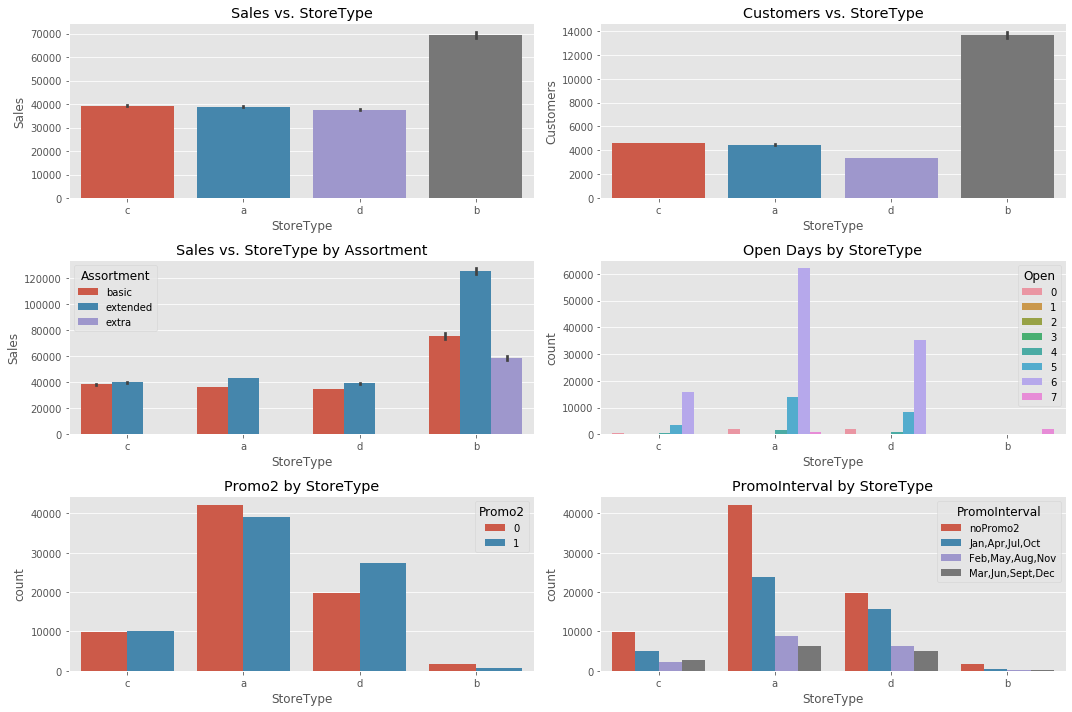

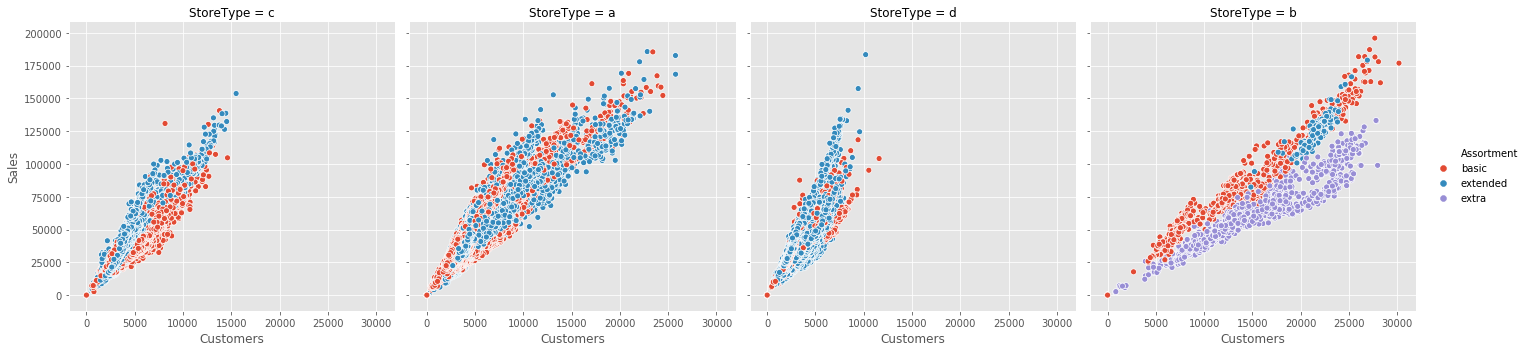

In [34]:
#visualize possible 'StoreType' characteristics

#create subplot
fig, axs = plt.subplots(nrows=3, ncols
                        =2, figsize=(15,10))

#plot different variables by 'StoreType'
#'StoreType' vs. 'Sales'
sns.barplot(x='StoreType', y='Sales', data=weekly_sales, ax=axs[0, 0])
axs[0,0].set_title('Sales vs. StoreType')

#'StoreType' vs. 'Customers'
sns.barplot(x='StoreType', y='Customers', data=weekly_sales, ax=axs[0, 1])
axs[0,1].set_title('Customers vs. StoreType')

#'StoreType' vs. 'Sales' with hue='Assortment'
sns.barplot(data=weekly_sales, x='StoreType', y='Sales', hue='Assortment', ax=axs[1, 0])
axs[1, 0].set_title('Sales vs. StoreType by Assortment')

#'StoreType' by 'Open'
sns.countplot(x='StoreType', hue='Open', data=weekly_sales, ax=axs[1, 1])
axs[1, 1].set_title('Open Days by StoreType')

#'StoreType' by 'Promo2'
sns.countplot(x='StoreType', hue='Promo2', data=weekly_sales, ax=axs[2, 0])
axs[2, 0].set_title('Promo2 by StoreType')

#'StoreType' by 'PromoInterval'
sns.countplot(x='StoreType', hue='PromoInterval', data=weekly_sales, ax=axs[2, 1])
axs[2, 1].set_title('PromoInterval by StoreType')

plt.tight_layout()
plt.show()

#'Sales' vs.'StoreType' with hue='Assortment'
sns.relplot(data=weekly_sales, x='Customers', y='Sales', col='StoreType', hue='Assortment')
plt.show()

Results:

- Store type 'b' has the highest sales and most customers.
- Only store type 'b' has extra assortment.
- Stores of store type 'b' seem to be open all day, whereas 'a' and 'd' seemed to be close more often (maybe due to refurbishment).
- Participating in Promo2 does not characterize store type.
- PromoInterval does not characterize store type.


Plotting average weekly sales and customers over time clearly highlights the performance differences between various store types.

In [35]:
#visualize average weekly 'Sales' and Customers' by 'StoreType'

#compute average values for each StoreType
by_store_type = weekly_sales.reset_index('Date') \
                            .groupby(['StoreType', 'Date']) \
                            .mean() \
                            .reset_index()

#different color for each store type
color_map = {'a': '#636EFA', 'b': '#EF553B', 'c': '#00CC96', 'd': '#AB63FA'}

fig = go.Figure()

#for each store
for store_type in by_store_type['StoreType'].unique():
    store_data = by_store_type[by_store_type['StoreType'] == store_type]
    #plot average weekly sales
    fig.add_trace(go.Scatter(
        x=store_data['Date'],
        y=store_data['Sales'],
        mode='lines',
        name=f'{store_type} - Sales',
        line=dict(color=color_map[store_type]),
        yaxis='y1'
    ))
    #plot average weekly customers 
    fig.add_trace(go.Scatter(
        x=store_data['Date'],
        y=store_data['Customers'],
        mode='lines',
        name=f'{store_type} - Customers',
        line=dict(color=color_map[store_type], dash='dash'),
        yaxis='y2'
    ))

#update layout for dual y-axes
fig.update_layout(
    title='Average Weekly Sales and Customers by Store Type',
    xaxis_title='Date',
    yaxis=dict(
        title='Sales',
        titlefont=dict(color='#7d7878'),
        tickfont=dict(color='#7d7878')
    ),
    yaxis2=dict(
        title='Customers',
        titlefont=dict(color='#7d7878'),
        tickfont=dict(color='#7d7878'),
        overlaying='y',
        side='right'
    ),
    legend=dict(
        x=1.1,
        y=1,
    )
)

fig.show()

**Seasonality & Trend**

Seasonality refers to regular fluctuations that recur over specific periods, such as increased sales during holidays or certain seasons. Trends indicate long-term movements or shifts in sales performance, whether upward, downward, or stable over time. Understanding these patterns is essential for strategic planning, inventory management, marketing campaigns, and optimizing store operations.

We start by looking at the average weekly sales over time. Beforehand, we create a function that computes continuous time periods where a store was closed as we want to visualize these time periods later.

In [36]:
#this function finds continuous time periods in a sorted list of dates that are separated by a specified 
#number of days (7). It returns a list of tuples, each representing the start and end of these contiguous period.
def find_timeperiods(dates, difference_days=7):
    merged_slots = []
    start = dates[0]
    end = dates[0]
    #iterate over list of dates, starting from second date
    for i in range(1, len(dates)):
        if (dates[i]-end).days == difference_days:
            #extend current period
            end = dates[i]
        else:
            #finish current period and start a new one
            merged_slots.append((start, end))
            start = dates[i]
            end = dates[i]

    #append last period
    merged_slots.append((start, end))

    return merged_slots

**Average weekly Sales**

In [37]:
#visualize average weekly sales of all stores over all years

#compute average weekly sales
average_weekly_sales = weekly_sales.reset_index('Date') \
                                   .groupby('Date') \
                                   .mean() \
                                   .reset_index()

#plot average weekly sales
fig = px.line(average_weekly_sales, x='Date', y='Sales', title='Average Weekly Sales')

#calculate 4-week rolling mean
rolling_mean_window = 4
average_weekly_sales['RollingMean'] = average_weekly_sales['Sales'].rolling(window=rolling_mean_window).mean()
#plot rolling mean
fig.add_trace(go.Scatter(x=average_weekly_sales['Date'], y=average_weekly_sales['RollingMean'],
                         mode='lines',line=dict(color='#370670', dash='dash'),
                         name=f'{rolling_mean_window}-Week RM'))

#extract dates when stores were closed
closed_dates = sorted(weekly_sales.query('Open == 0').index.unique())
#compute continuous timeperiods 
consecutive_timeslots = find_timeperiods(closed_dates)
#add shaded rectangles for each timeperiod when stores were closed
for start, end in consecutive_timeslots:
    fig.add_shape(
        type="rect",
        x0=start,
        x1=end,
        y0=0,
        y1=1,  
        xref="x",
        yref="paper",
        fillcolor="LightSalmon",
        opacity=0.5,
        layer="below",
        line_width=0,
    )

#add a dummy trace for legend
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', line=dict(color='LightSalmon'), name='Stores closed'))
    
#extract sales values for Christmas dates
christmas = ["2013-12-22", "2014-12-21"]
christmas_df = average_weekly_sales.query(f'Date in {christmas}')
#add markers at each Christmas date and corresponding sale value
fig.add_trace(go.Scatter(
    x=christmas_df['Date'],
    y=christmas_df['Sales'],
    mode='markers',
    marker=dict(color='red', size=15, symbol='circle-open'),
    name='Christmas'))

fig.update_layout(showlegend=True)
fig.show()

Results:

- Seasonal patterns are evident, with lower sales in January and higher sales in December.
- Sales peak notably during Christmas.
- There is no trend (increasing/ decreasing sales over the years).
- The peaks in sales appear to be legitimate, occurring during festive seasons, rather than being outliers caused by errors in the dataset. Therefore, we decided to not remove or adjust them.

<br>


**Average monthly Sales**

In [38]:
#visualize average sales per month

#aggregate sales on monthly basis
monthly_sales = weekly_sales.resample('M') \
                            .mean() \
                            .reset_index()

#extract month and convert month from 1->Jan, 2->Feb, ..., 12->Dec
monthly_sales['Month'] = monthly_sales['Date'].apply(lambda x: x.strftime("%b"))
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)

#compute average sales per month
average_monthly_sales = monthly_sales.groupby('Month') \
                                     .mean() \
                                     .reset_index()
#plot average monthly sales
fig = px.line(average_monthly_sales, x='Month', y='Sales', title='Average Sales per Month')
fig.update_traces(mode='lines+markers')
fig.show()

Results:

- The sales vary across months.
- January, September, and October show the lowest sales.
- There is a peak in December, likely due to the festive season.
- Sales remain relatively consistent from February to August.

<br>

**Average sales per Day in Month**

In [39]:
#visualize average sales per day in month

day_in_month_sales = sales.reset_index() \
                          .rename(columns={'index': 'Date'})

#extract day of month and calculate average sales per day 
day_in_month_sales['Day'] = day_in_month_sales['Date'].dt.day
day_in_month_sales = day_in_month_sales.groupby('Day') \
                                       .mean() \
                                       .reset_index()

#plot average sales per day in month
fig = px.line(day_in_month_sales, x='Day', y='Sales', title='Average Sales per Day in Month')
fig.update_traces(mode='lines+markers')
fig.show()

Results:

- Sales peak on the 30th of the month, followed by the 2nd and 4th.
- Sales are lowest on the 1st, 25th, and 26th of the month.

<br>

**Promo2 - Average weekly Sales**

We see again, that taking part in _'Promo2'_ decreases sales.

In [40]:
#visualize average weekly sales by 'Promo2'

#compute average weekly sales by 'Promo2' participation
by_promo2 = weekly_sales.reset_index('Date') \
                        .groupby(['Promo2', 'Date']) \
                        .mean() \
                        .reset_index()

#plot average weekly sales by 'Promo2'
fig = px.line(by_promo2, x='Date', y='Sales', color='Promo2', title='Average Weekly Sales by Promo2 Participation')
fig.show()

### EDA - Conclusion

**<u>Sales Driver</u>**

- The more frequently a store is open, the higher are its sales.
- Customers increase sales.
- Promotion days increase sales.
- Store type 'b' attracts many customers and generates high sales. Store types 'a', 'c' and 'd' have less customers and lower sales.
- State holidays decrease sales.
- Taking part in Promo2 decreases sales.
- Stores with extra assortment have higher sales than stores with extended or basic assortment.
- January, September, and October show the lowest sales.
- There is a sales peak in December, especially at Christmas.
- Sales peak on the 30th of the month, followed by the 2nd and 4th.
- Sales are lowest on the 1st, 25th, and 26th of the month.

Based on these findings, we provide the following strategic recommendations to optimize for sales.

**<u>Strategic Recommendations</u>**

1. Expand store type 'b': <br>Given that Store Type 'b' has the highest sales and most customers, increase the number of stores of this type. This could involve opening new Type 'b' stores or converting existing lower-performing stores (types 'a', 'c', and 'd') to type 'b'.


2. Enhance Assortment: <br>Expand the extra assortment to more stores. Since only store type 'b' has extra assortment and performs the best, consider extending this assortment to other store types.


3. Optimize Store Hours: <br> Ensure stores remain open as frequently as possible. Avoid closures during peak shopping times and reduce temporary closures for refurbishment by managing them during off-peak periods.


4. Refine Promotion Strategy: <br> Increase the number of promotion days to boost sales. Reevaluate the effectiveness of Promo2. Since stores participating in Promo2 see a decrease in sales, consider discontinuing this promotion or modifying its structure to better appeal to customers.


5. Maximize Customer Engagement: <br> Implement initiatives to attract more customers, as customer traffic correlates positively with sales. This could include loyalty programs, improved customer service, or targeted marketing campaigns.


6. Maximize December Sales: <br> Capitalize on the December peak, especially around Christmas, by offering special holiday deals and extended shopping hours.


7. Boost Promotions in Low-Sales Days & Months: <br> Implement targeted marketing campaigns and special promotions during January, April, September, and October, as well as on the 1st, 25th, and 26th of each month to stimulate sales. 


<br>

## Performance Reports

This chapter covers the following tasks:
- Computing Store Performance Metrics
- Computing Store Rankings
- Creating Overall Report
- Creating Individual Reports

<br>

In this section, we will generate reports containing information about the performance of all 1,115 stores as well as each store individually. To ensure a fair comparison, we must take into account that some stores were closed more frequently than others (e.g., due to refurbishment). These closures impact the total sales and customer numbers, making direct comparisons between stores based on these metrics difficult. To address this, we will compute the following statistics:

- _'SalesPerDay'_ : The average daily sales when the store was open
- _'CustomersPerDay'_ : The average daily customers when the store was open
- _'SalesPerCustomer'_ : The average amount spent by each customer

By normalizing sales and customer counts to the number of open days, we can compare store performance, even when their operational days differ.

In [41]:
#compute new metrics for fair comparison
performance_df = weekly_sales.copy()
performance_df['SalesPerDay'] = weekly_sales['Sales']/weekly_sales['Open']
performance_df['CustomersPerDay'] = weekly_sales['Customers']/weekly_sales['Open']
performance_df['SalesPerCustomer'] = weekly_sales['Sales']/weekly_sales['Customers']

<br>

### Overall Report

Now, that we have created these metrics, we can fairly compare the performance across stores. Therefore, we will generate one overall report that shows the performance of all 1,115 stores. This report will be structured as follows:

1. Store Performances: This section provides a detailed overview of each store's performance across several key metrics:
    - _'SalesTotal'_ : The total sales generated by the store
    - _'CustomersTotal'_ : The total number of customers of the store
    - _'SalesPerDay'_ :	The average sales per day when the store was open
    - _'CustomersPerDay'_ :	The average number of customers per day when the store was open
    - _'SalesPerCustomer'_ : The average sales amount per customer
    - _'OpenTotal'_ : The total number of days the store was open
    - _'PromoTotal'_ : The total number of days the store ran promotions
    - _'SchoolHolidayTotal'_ : The total number of school holidays
    - _'StateHolidayTotal'_ : The total number of state holidays
    

2. Store Rankings: This section provides a ranking (from 1 to 1,115) of the stores based on their performance in the following metrics:
    - _'SalesPerDay'_
    - _'CustomersPerDay'_
    - _'SalesPerCustomer'_

In [42]:
#this function computes the performance metrics for each store and stores them in a dataframe
def compute_performance_metrics(performance_df):
    #extract columns we need for computing the performance metrics
    subset = performance_df[['Store','Sales','Customers','Open','Promo','SchoolHoliday',
                             'SalesPerDay','CustomersPerDay','SalesPerCustomer']]
    
    #compute average SalesPerDay, CustomersPerDay, and SalesPerCustomer for each store
    ratios = round(subset.groupby('Store')[['SalesPerDay','CustomersPerDay','SalesPerCustomer']].mean(),2)
    #compute total Sales, Customers, Opendays, Promodays, SchoolHolidays per store
    totals = subset.groupby('Store')[['Sales','Customers','Open','Promo','SchoolHoliday']].sum()
    
    #combine both dataframes
    performance_all_stores = pd.merge(ratios, totals, on='Store', how='left')
    
    #add total StateHolidays (including Christmas and Easter) to report
    performance_all_stores['StateHoliday'] = performance_df.groupby('Store')[['StateHoliday','Christmas','Easter']].sum().sum(axis=1)
    
    #rename columns
    performance_all_stores.columns = ['SalesPerDay','CustomersPerDay','SalesPerCustomer','SalesTotal','CustomersTotal',
                                      'OpenTotal','PromoTotal','SchoolHolidayTotal','StateHolidayTotal']

    return performance_all_stores

In [43]:
#this function computes the rank of each store across the performance metrics
def rank_stores(performance_all_reports):
    #rank stores for variables 'SalesPerDay', 'CustomersPerDay' and 'SalesPerCustomer'
    sales_per_day_ranking = (performance_all_reports \
                                                    .sort_values(by='SalesPerDay', ascending=False) \
                                                    .reset_index()['Store'])
    customers_per_day_ranking = (performance_all_reports \
                                                         .sort_values(by='CustomersPerDay', ascending=False) \
                                                         .reset_index()['Store'])
    sales_per_customer_ranking = (performance_all_reports \
                                                          .sort_values(by='SalesPerCustomer', ascending=False) \
                                                          .reset_index()['Store'])
    
    #combine rankings into one dataframe
    ranking_all_stores = pd.concat([sales_per_day_ranking, customers_per_day_ranking, sales_per_customer_ranking], axis=1)
    ranking_all_stores.columns =['SalesPerDay','CustomersPerDay','SalesPerCustomer']
    ranking_all_stores['Rank'] = np.arange(1,1116)
    ranking_all_stores.set_index('Rank', inplace=True)
    
    return ranking_all_stores

In [44]:
#this function will be used to display the individual sections of the reports next to each other
#this function displays multiple dataframes with titles next to each other
def display_dataframes(dataframes, titles):
    #get main headline and individual headlines
    main_headline = f"<h2>{titles[0]}</h2>"
    headlines = [f"<h3>{title}</h3>" for title in titles[1:]]
    
    #convert dataframes to HTML tables
    dataframes_html = [df.to_html() for df in dataframes]
    
    #combine HTML tables with headlines and CSS for side-by-side display
    combined_html = f"""
    <div>
        {main_headline}
        <div style="display: flex;">
    """
    for headline, df_html in zip(headlines, dataframes_html):
        combined_html += f"""
            <div style="margin-right: 20px;">
                {headline}
                {df_html}
            </div>
        """
    combined_html += "</div></div>"
    
    #display combined HTML string
    display_html(combined_html, raw=True)

In [45]:
#additional function for overall reports
#this function returns the top n stores for a given category of the overall report
def top_stores(n, category): 
    #compute performance metrics for each store
    performance_all_stores = compute_performance_metrics(performance_df)
    #sort stores by category
    top_stores = performance_all_stores.sort_values(by=category, ascending=False).head(n).index.tolist()
    
    return top_stores

Finally, this function combines the previous methods and generates and displays the overall performance report based on the weekly sales:

In [46]:
def overall_report(performance_df):
    performance_all_stores = compute_performance_metrics(performance_df)
    ranking_all_stores = rank_stores(performance_all_stores)
    display_dataframes(dataframes = [performance_all_stores, ranking_all_stores],
                       titles=['Overall Performance Report', 'Store Performances', 'Store Rankings'])

Let's create the overall performance report for all 1,115 Rossman stores:

In [47]:
overall_report(performance_df)

Overall Performance Report 
 
 
 
 Store Performances 
 
 
 
 
 SalesPerDay 
 CustomersPerDay 
 SalesPerCustomer 
 SalesTotal 
 CustomersTotal 
 OpenTotal 
 PromoTotal 
 SchoolHolidayTotal 
 StateHolidayTotal 
 
 
 Store 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1 
 4777.93 
 565.99 
 8.41 
 3716854 
 440523 
 781 
 360 
 193 
 27 
 
 
 2 
 4953.93 
 584.12 
 8.43 
 3883858 
 457855 
 784 
 360 
 167 
 25 
 
 
 3 
 6953.99 
 751.64 
 9.16 
 5408261 
 584310 
 779 
 360 
 170 
 29 
 
 
 4 
 9676.86 
 1326.03 
 7.27 
 7556507 
 1036254 
 784 
 360 
 173 
 24 
 
 
 5 
 4677.81 
 537.52 
 8.61 
 3642818 
 418588 
 779 
 360 
 172 
 31 
 
 
 6 
 5515.79 
 635.74 
 8.63 
 4297758 
 495483 
 780 
 360 
 172 
 31 
 
 
 7 
 8835.07 
 950.05 
 9.25 
 6930202 
 745569 
 786 
 360 
 159 
 24 
 
 
 8 
 5539.97 
 657.98 
 8.33 
 4342857 
 516027 
 784 
 360 
 159 
 24 
 
 
 9 
 6575.83 
 581.07 
 11.23 
 5112061 
 451677 
 779 
 360 
 170 
 29 
 
 
 10 
 5575.75 
 594.67 
 9.35 
 4365642 
 465661 
 784 
 360 
 209 
 24 
 
 
 11 
 8057.10 
 1132.58 
 7.06 
 6296286 
 885992 
 784 
 360 
 159 
 24 
 
 
 12 
 7592.81 
 897.90 
 8.38 
 5950245 
 703211 
 784 
 360 
 159 
 24 
 
 
 13 
 5076.84 
 385.35 
 13.01 
 3126578 
 237740 
 621 
 286 
 124 
 29 
 
 
 14 
 5515.01 
 632.43 
 8.67 
 4291174 
 491913 
 779 
 360 
 170 
 29 
 
 
 15 
 6688.20 
 665.14 
 9.98 
 5231510 
 520107 
 784 
 360 
 159 
 24 
 
 
 16 
 7694.66 
 852.53 
 8.98 
 5967891 
 662375 
 777 
 360 
 155 
 32 
 
 
 17 
 6337.12 
 792.43 
 7.90 
 4954488 
 619090 
 782 
 360 
 167 
 25 
 
 
 18 
 6572.67 
 714.48 
 9.13 
 5130137 
 557785 
 782 
 360 
 167 
 25 
 
 
 19 
 6472.58 
 625.11 
 10.27 
 5036169 
 486618 
 779 
 360 
 170 
 29 
 
 
 20 
 7764.36 
 847.31 
 9.15 
 4801543 
 525258 
 619 
 286 
 124 
 29 
 
 
 21 
 5492.53 
 517.61 
 10.46 
 4259763 
 401213 
 777 
 360 
 155 
 32 
 
 
 22 
 4548.31 
 505.40 
 8.94 
 2801506 
 312129 
 619 
 286 
 124 
 29 
 
 
 23 
 5533.26 
 483.94 
 11.33 
 4300299 
 375818 
 779 
 360 
 150 
 29 
 
 
 24 
 9419.85 
 837.94 
 11.15 
 7313475 
 650800 
 779 
 360 
 170 
 29 
 
 
 25 
 11121.73 
 1562.41 
 7.09 
 8376557 
 1177772 
 752 
 360 
 170 
 29 
 
 
 26 
 6690.37 
 557.94 
 11.86 
 5217266 
 434849 
 782 
 360 
 167 
 25 
 
 
 27 
 9497.57 
 1077.22 
 8.72 
 7383809 
 837237 
 779 
 360 
 170 
 29 
 
 
 28 
 5303.00 
 582.19 
 9.01 
 4080950 
 448196 
 771 
 360 
 168 
 29 
 
 
 29 
 7384.37 
 655.42 
 11.15 
 5737160 
 509233 
 779 
 360 
 170 
 29 
 
 
 30 
 5303.26 
 778.67 
 6.77 
 4114046 
 603828 
 777 
 360 
 170 
 29 
 
 
 31 
 5882.03 
 588.05 
 9.94 
 4596143 
 459464 
 784 
 360 
 159 
 24 
 
 
 32 
 4090.15 
 478.59 
 8.47 
 2526117 
 296333 
 621 
 286 
 124 
 29 
 
 
 33 
 8467.54 
 839.18 
 10.05 
 6572158 
 651485 
 779 
 360 
 170 
 29 
 
 
 34 
 8045.76 
 994.98 
 8.05 
 6296685 
 778872 
 784 
 360 
 173 
 24 
 
 
 35 
 9716.10 
 730.80 
 13.14 
 7558693 
 568401 
 779 
 360 
 170 
 29 
 
 
 36 
 9401.63 
 1092.27 
 8.60 
 5824183 
 678178 
 622 
 286 
 124 
 29 
 
 
 37 
 7145.90 
 785.01 
 9.04 
 5549053 
 609251 
 780 
 360 
 168 
 29 
 
 
 38 
 6017.80 
 536.81 
 11.10 
 4677617 
 417034 
 779 
 360 
 170 
 29 
 
 
 39 
 4865.23 
 630.97 
 7.61 
 3780153 
 490471 
 779 
 360 
 170 
 29 
 
 
 40 
 4908.34 
 664.48 
 7.37 
 3804215 
 515125 
 776 
 360 
 170 
 29 
 
 
 41 
 5402.67 
 402.34 
 13.33 
 3318407 
 247531 
 622 
 286 
 124 
 29 
 
 
 42 
 10191.81 
 1101.57 
 9.19 
 7928768 
 856938 
 779 
 360 
 170 
 29 
 
 
 43 
 6832.29 
 611.36 
 11.09 
 5315050 
 475314 
 779 
 360 
 170 
 29 
 
 
 44 
 5481.20 
 640.66 
 8.49 
 4295144 
 501806 
 784 
 360 
 173 
 24 
 
 
 45 
 5367.64 
 417.14 
 12.78 
 4166458 
 323582 
 779 
 360 
 150 
 29 
 
 
 46 
 5415.06 
 665.76 
 8.02 
 3329125 
 410832 
 622 
 286 
 124 
 29 
 
 
 47 
 7156.75 
 921.80 
 7.71 
 5601760 
 721790 
 784 
 360 
 169 
 24 
 
 
 48 
 3941.04 
 430.12 
 9.15 
 3085014 
 336519 
 784 
 360 
 169 
 24 
 
 
 49 
 7336.78 
 533.78 
 13.64 
 5675296 

<br>

### Individual Report

Now, we will generate a report that shows the individual performance of each store. This report will be structured as follows:

1. Store Info: This section provides information about the store, namely:
    - _'Store'_ :	The unique ID of the store
    - _'StoreType'_ : The store type of the store
    - _'Assortment'_ : The assortment of the store
    - _'CompetitionDistance'_ :	The distance in meters to the nearest competitor store
    - _'CompetitionOpenSinceMonth'_ : The month of the time the nearest competitor store was opened
    - _'CompetitionOpenSinceYear'_ : The year of the time the nearest competitor store was opened
    - _'Promo2'_ :	Whether the store participates in Promo2
    - _'Promo2SinceWeek'_ :	The calendar week when the store started participating in Promo2
    - _'Promo2SinceYear'_ :	The year when the store started participating in Promo2
    - _'PromoInterval'_ : The consecutive intervals the store starts Promo2


2. Store Performance: This section provides a detailed overview of the store's performance across several key metrics:
    - _'SalesTotal'_ : The total sales generated by the store
    - _'CustomersTotal'_ : The total number of customers who visited the store
    - _'SalesPerDay'_ :	The average sales per day when the store was open
    - _'CustomersPerDay'_ :	The average number of customers per day when the store was open
    - _'SalesPerCustomer'_ : The average sales amount per customer
    - _'OpenTotal'_ : The total number of days the store was open
    - _'PromoTotal'_ : The total number of days the store ran promotions
    - _'SchoolHolidayTotal'_ : The total number of school holidays
    - _'StateHolidayTotal'_ : The total number of state holidays (including Christmas and Easter)
    

3. Store Ranking: This section provides a ranking of the store (from 1 to 1,115) based on their performance in the following metrics:
    - _'SalesPerDay'_
    - _'CustomersPerDay'_
    - _'SalesPerCustomer'_
    
    
4. Performance Visualization: This section visualizes the average weekly sales and customers of the store from 2013-2015.

In [48]:
#this function computes the rank of a store for a given category
def get_store_rank(store_id, category):
    #compute performance metrics for all stores
    performance_all_stores = compute_performance_metrics(performance_df)
    #get rank of store for the specified category
    rank = performance_all_stores.sort_values(by=category, ascending=False).index.get_loc(store_id)+1 
    
    return rank

In [49]:
#this function creates the following dataframes for the individual report: store_info, store_performace, store_ranking
def individual_performance(store_id):
    #get store information
    store_info = pd.DataFrame(performance_df.query(f'Store=={store_id}')[store.columns].iloc[0])
    #adjust index and column names
    store_info.index.name = 'Info'
    store_info.columns = ['Value']
    store_info.reset_index(inplace=True)
    
    #compute performance metrics of all stores
    performance_all_stores = compute_performance_metrics(performance_df)
    #extract performance metrics for specific store
    store_performance = pd.DataFrame(performance_all_stores.loc[store_id])
    #adjust index and column names
    store_performance.index.name = 'Category'
    store_performance.columns = ['Value']
    store_performance.reset_index(inplace=True)
    
    #compute ranks for the three performance metrics
    rank_sales_per_day = get_store_rank(store_id, 'SalesPerDay')
    rank_customers_per_day = get_store_rank(store_id, 'CustomersPerDay')
    rank_sales_per_customer = get_store_rank(store_id, 'SalesPerCustomer')
    
    #compute scores
    score_sales_per_day = int(100 * (1- (rank_sales_per_day-1)/(1115-1)))
    score_customers_per_day = int(100 * (1- (rank_customers_per_day-1)/(1115-1)))
    score_sales_per_customer = int(100 * (1- (rank_sales_per_customer-1)/(1115-1)))
    
    #store ranks and scores in a dataframe
    categories = ['SalesPerDay', 'CustomersPerDay', 'SalesPerCustomer']
    ranks = [rank_sales_per_day, rank_customers_per_day, rank_sales_per_customer,]
    scores = [score_sales_per_day, score_customers_per_day, score_sales_per_customer,]
    store_ranking = pd.DataFrame({'Category': categories, 'Rank': ranks, 'Score (0-100)': scores})
    
    return store_info, store_performance, store_ranking

In [50]:
#this function visualizes the weekly sales and customers and their 4-week Rolling Mean for a given store
def plot_store_performance(performance_df, store_id):
    #extract data of store
    store_weekly_sales = performance_df.query(f'Store == {store_id}')

    #calculate 4-week rolling means for sales and customers
    rolling_mean_window = 4
    store_weekly_sales['Sales_RollingMean'] = store_weekly_sales['Sales'].rolling(window=rolling_mean_window).mean()
    store_weekly_sales['Customers_RollingMean'] = store_weekly_sales['Customers'].rolling(window=rolling_mean_window).mean()

    store_weekly_sales.reset_index(inplace=True)
    fig = go.Figure()
    
    #plot sales
    fig.add_trace(go.Scatter(
        x=store_weekly_sales['Date'],
        y=store_weekly_sales['Sales'],
        mode='lines',
        name='Sales',
        line=dict(color='#069dc7')
    ))
    #plot sales rolling mean
    fig.add_trace(go.Scatter(
        x=store_weekly_sales['Date'],
        y=store_weekly_sales['Sales_RollingMean'],
        mode='lines',
        name=f'Sales {rolling_mean_window}-Week RM',
        line=dict(color='#069dc7', dash='dash')
    ))

    #plot customers
    fig.add_trace(go.Scatter(
        x=store_weekly_sales['Date'],
        y=store_weekly_sales['Customers'],
        mode='lines',
        name='Customers',
        line=dict(color='#fa7223'),
        yaxis='y2'
    ))
    #plot customers rolling mean
    fig.add_trace(go.Scatter(
        x=store_weekly_sales['Date'],
        y=store_weekly_sales['Customers_RollingMean'],
        mode='lines',
        name=f'Customers {rolling_mean_window}-Week RM',
        line=dict(color='#fa7223', dash='dash'),
        yaxis='y2'
    ))

    #extract dates when store was closed
    #check if store was closed
    if len(store_weekly_sales.query('Open == 0'))>0:
        closed_dates = sorted(store_weekly_sales.set_index('Date').query('Open ==0').index.unique())
        #compute continuous timeperiods 
        consecutive_timeslots = find_timeperiods(closed_dates)
        #add shaded rectangles for each timeperiod when store was closed
        for start, end in consecutive_timeslots:
            fig.add_shape(
                type="rect",
                x0=start,
                x1=end,
                y0=0,
                y1=1,  
                xref="x",
                yref="paper",
                fillcolor="LightSalmon",
                opacity=0.5,
                layer="below",
                line_width=0,
            )
        #add a dummy trace for legend
        fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
                                 line=dict(color='LightSalmon', width=2, dash='dash'),name='Store closed'))

    #update layout for dual y-axes
    fig.update_layout(
        title=f'Store {store_id} - Weekly Sales and Customers',
        xaxis_title='Date',
        yaxis_title='Sales',
        yaxis=dict(
            title='Sales',
            titlefont=dict(color='#069dc7'),
            tickfont=dict(color='#069dc7')
        ),
        yaxis2=dict(
            title='Customers',
            titlefont=dict(color='#fa7223'),
            tickfont=dict(color='#fa7223'),
            overlaying='y',
            side='right'
        ),
        legend=dict(
        x=1.1,
        y=1),
        template='plotly_white'
    )

    fig.show()

This function combines the previous methods and generates the individual report for a specific store, based on weekly sales:

In [51]:
#this function creates and displays the individual performance report for a given store
def individual_report(store_id):
    store_info, store_performance, store_ranking = individual_performance(store_id)
    display_dataframes(dataframes = [store_info, store_performance, store_ranking],
                       titles = [f'Report - Store {store_id}', 'Store Info', 'Store Performance', 'Store Ranking'])
    plot_store_performance(weekly_sales, store_id)

Let's have a look at some individual reports.

In [52]:
individual_report(store_id=100)

Report - Store 100 
 
 
 
 Store Info 
 
 
 
 
 Info 
 Value 
 
 
 
 
 0 
 Store 
 100 
 
 
 1 
 StoreType 
 d 
 
 
 2 
 Assortment 
 basic 
 
 
 3 
 CompetitionDistance 
 17930 
 
 
 4 
 CompetitionOpenSinceMonth 
 0 
 
 
 5 
 CompetitionOpenSinceYear 
 0 
 
 
 6 
 Promo2 
 0 
 
 
 7 
 Promo2SinceWeek 
 0 
 
 
 8 
 Promo2SinceYear 
 0 
 
 
 9 
 PromoInterval 
 noPromo2 
 
 
 
 
 
 
 Store Performance 
 
 
 
 
 Category 
 Value 
 
 
 
 
 0 
 SalesPerDay 
 8100.33 
 
 
 1 
 CustomersPerDay 
 694.59 
 
 
 2 
 SalesPerCustomer 
 11.60 
 
 
 3 
 SalesTotal 
 4826434.00 
 
 
 4 
 CustomersTotal 
 415849.00 
 
 
 5 
 OpenTotal 
 606.00 
 
 
 6 
 PromoTotal 
 286.00 
 
 
 7 
 SchoolHolidayTotal 
 124.00 
 
 
 8 
 StateHolidayTotal 
 29.00 
 
 
 
 
 
 
 Store Ranking 
 
 
 
 
 Category 
 Rank 
 Score (0-100) 
 
 
 
 
 0 
 SalesPerDay 
 261 
 76 
 
 
 1 
 CustomersPerDay 
 528 
 52 
 
 
 2 
 SalesPerCustomer 
 190 
 83

In [53]:
individual_report(817)

Report - Store 817 
 
 
 
 Store Info 
 
 
 
 
 Info 
 Value 
 
 
 
 
 0 
 Store 
 817 
 
 
 1 
 StoreType 
 a 
 
 
 2 
 Assortment 
 basic 
 
 
 3 
 CompetitionDistance 
 140 
 
 
 4 
 CompetitionOpenSinceMonth 
 3 
 
 
 5 
 CompetitionOpenSinceYear 
 2006 
 
 
 6 
 Promo2 
 0 
 
 
 7 
 Promo2SinceWeek 
 0 
 
 
 8 
 Promo2SinceYear 
 0 
 
 
 9 
 PromoInterval 
 noPromo2 
 
 
 
 
 
 
 Store Performance 
 
 
 
 
 Category 
 Value 
 
 
 
 
 0 
 SalesPerDay 
 21747.79 
 
 
 1 
 CustomersPerDay 
 3126.04 
 
 
 2 
 SalesPerCustomer 
 6.96 
 
 
 3 
 SalesTotal 
 17057867.00 
 
 
 4 
 CustomersTotal 
 2454370.00 
 
 
 5 
 OpenTotal 
 784.00 
 
 
 6 
 PromoTotal 
 360.00 
 
 
 7 
 SchoolHolidayTotal 
 173.00 
 
 
 8 
 StateHolidayTotal 
 24.00 
 
 
 
 
 
 
 Store Ranking 
 
 
 
 
 Category 
 Rank 
 Score (0-100) 
 
 
 
 
 0 
 SalesPerDay 
 1 
 100 
 
 
 1 
 CustomersPerDay 
 4 
 99 
 
 
 2 
 SalesPerCustomer 
 1045 
 6

## Feature Engineering 

This chapter covers the following tasks:

- Train Test Split
- Building Baseline Model
- Building Linear Model
- Feature Selection
- Adding Features

**Train Test Split**

The final objective of this project is to develop a model for predicting future sales. To train this model, we must split our data into a train and test set. As Rossmann store managers are tasked to predict their weekly sales for up to eight weeks in advance, we decided to use the last 8 weeks of the data as test set. The data up to this date is used for training.

In [54]:
data = weekly_sales_dummies.copy()

#make sure date index is in the right order
data = data.sort_values(by=['Store','Date'])

#split data in train and test set -> last 8 weeks as test set
split_date = data.index[-8]
train = data.loc[data.index < split_date]
test = data.loc[data.index >= split_date]

Let's visualize the train and test set.

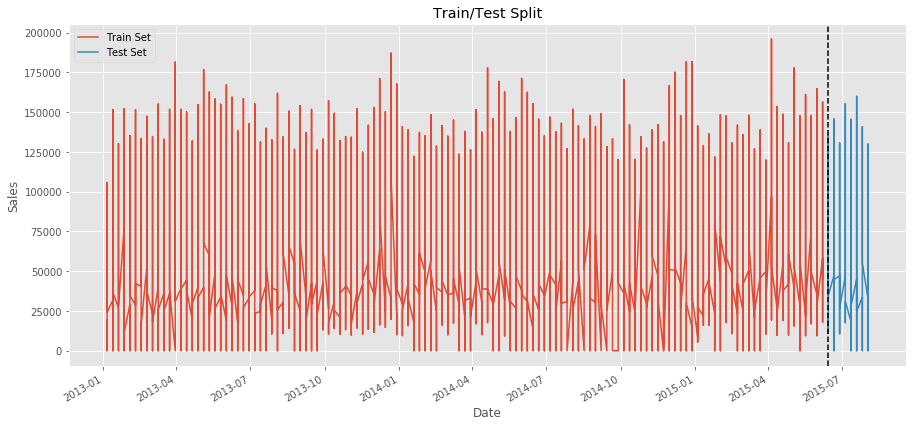

In [55]:
#visualize train and test set
fig, ax = plt.subplots(figsize=(15,7))
train['Sales'].plot(ax=ax, label='Train Set', title='Train/Test Split')
test['Sales'].plot(ax=ax, label='Test Set')
ax.axvline(split_date, color='black', ls='--')
plt.ylabel('Sales')
plt.legend()
plt.show()

Before building our first model, we need to define some functions. To compare the performance of the models, we define a function that computes several evaluation metrics.

In [56]:
#this function computes the metrics Root Mean Squared Error (RMSE), R^2 and Adjusted R^2
def compute_metrics(X_test, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    r2 = r2_score(y_true, y_pred)
    
    #compute r2_adjusted
    n = len(y_true)  
    p = X_test.shape[1]
    r2_adjusted = 1-(1-r2)*(n-1)/(n-p-1)
    
    return rmse, r2, r2_adjusted

 Additionally, we define a function to visualize the true and predicted sales.

In [57]:
#this function visualizes the true sales and predicted sales
def plot_true_vs_pred_sales(X_test, y_true, y_pred, model):
    plt.figure(figsize=(10,5))
    
    #plot true sales
    plt.scatter(X_test.index, y_true, color='red', marker='o', label='True')
    #plot predicted sales
    plt.scatter(X_test.index, y_pred, color='green', marker='x', label='Prediction')

    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title(f'{model}\nTrue Sales vs. Predicted Sales')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<br>

**Baseline Model**

To obtain an initial benchmark for sales prediction performance, we will start by developing a baseline model. This baseline model uses the historical average of past sales as the best estimate for future sales. By evaluating its performance, we can set a standard for developing more accurate models.

In [58]:
#baseline model
def baseline(y_train, y_test):
    historical_mean = y_train.mean()
    #future predictions, all set to the historical mean
    y_pred = np.full((len(y_test)), historical_mean)
    
    return y_pred

Lets' run the baseline model on the test set and see how it performs.

Performance - Baseline Model:
-----------------------------
RMSE: 16297.38
R^2: -0.02


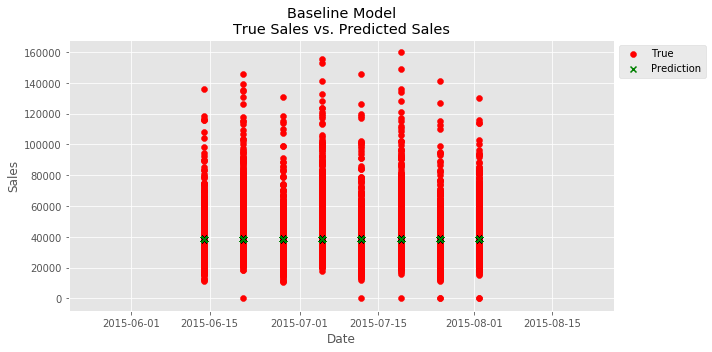

In [59]:
#make predictions with baseline model
y_pred_baseline = baseline(train['Sales'], test['Sales'])

#evaluate baseline model
rmse, r2, r2_adjust = compute_metrics(test, test['Sales'], y_pred_baseline)
print('Performance - Baseline Model:')
print('-----------------------------')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

#visualize predictions of baseline model
plot_true_vs_pred_sales(test, test['Sales'], y_pred_baseline, 'Baseline Model')

The baseline model shows poor performance, as indicated by a high RMSE value and a very low value of R². The high RMSE value of 16297.38 indicates that the predicted sales are, on average, far from the actual sales. An R² of -0.02 indicates that the model is failing to capture any of the variability in the data.<br>
To achieve better results, we will start by building a simple linear model and select the features we believe will contribute to predicting sales more accurately.

<br>


**Feature Selection**

In this section, we aim to determine which features to include in our prediction model and create additional features as needed. Initially, we will exclude some features that we believe do not contribute to predicting sales. The variables we are excluding are:

- _'CompetitionOpenSinceYear'_ (R1, R2, R3, R4)
- _'CompetitionOpenSinceMonth'_ (R1, R2, R3, R4)
- _'Promo2SinceYear'_ (R1, R3, R4)
- _'Promo2SinceWeek'_ (R1, R3, R4)
- _'PromoInterval'_ (R1, R4)
- _'CompetitionDistance'_ (R1)
- _'Store'_ (R1)
- _'StateHoliday'_ (R1)
- _'Easter'_ (R1)
- _'SchoolHoliday'_ (R1)
- _'Assortment'_ (R4)
- _'Customers'_ (R5)

The reasons for excluding these features are as follows:

- **R1:** Exploratory Data Analysis (EDA) indicates a weak relationship with the target variable _'Sales'_.
- **R2:** Contains a significant number of missing values.
- **R3:** Many values are from years prior to 2013. Since our data starts in 2013, it is reasonable to assume that events (like promo starts or competition openings) that occurred multiple years earlier have no impact on sales in 2015.
- **R4:** High intercorrelation between variables, suggesting their impact on sales is already represented by other features in the dataset.
- **R5:** Similar to the target variable _'Sales'_ , we do not know the weekly customer number in the future, thus we cannot use it for prediction.


Additionally, the EDA revealed that store types 'a', 'c' and 'd' have very similar sales performance, whereas only store type 'b' has distinct sales performance. For this reason, we decided to only capture if a store is of type 'b' or not. Accordingly, we are going to exclude all dummy varibales of _'StoreType'_ except the dummy variable _'StoreType_b'_.


Let's create the linear model with the remaining features as input and see how it performs.

In [60]:
#features that we think will predict sales
FEATURES = ['Open','Promo','Christmas','StoreType_b','Promo2']
TARGET = ['Sales']

#define features and target 
X_train = train[FEATURES]
X_test = test[FEATURES]
y_train = train[TARGET].values
y_test = test[TARGET].values

Performance - Linear Model:
---------------------------
RMSE: 14381.09
R^2: 0.20
Adjusted R^2: 0.20


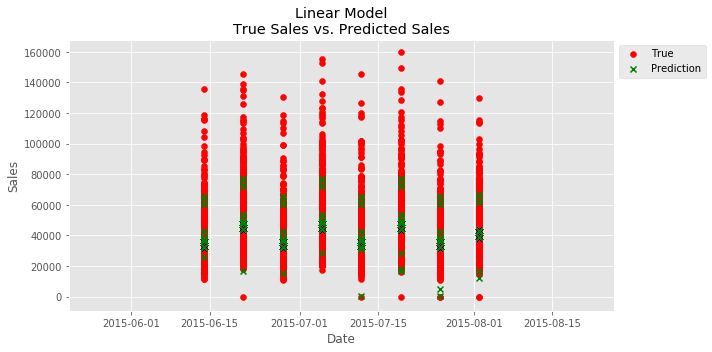

In [61]:
#create and train linear model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
#make predictions on test set
y_pred_linear = linreg.predict(X_test)

#evaluate linear model
rmse, r2, r2_adjusted = compute_metrics(X_test, y_test, y_pred_linear)
print('Performance - Linear Model:')
print('---------------------------')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')
print(f'Adjusted R^2: {r2_adjusted:.2f}')

#visualize predictions of linear model
plot_true_vs_pred_sales(X_test, y_test, y_pred_linear, 'Linear Model')

Although the linear model performs better than the baseline model, this performance is still not satsifactory. Feature scaling using MinMaxScaler or StandardScaler would also not improve the performance. We need to add more relevant features. We think about adding two kinds of features in order to capture seasonality and trends.

1. Time Series Features
    - year
    - month
    - quarter
    
    
2. Lag Features for Sales and Customers
    - 8-10 week lag 
    
<br>

**Adding Features** 

We need to add the new features to the data and also update the train and test data.

In [62]:
#add new features to data

data_w_new_features = data.copy()

#add time series features
data_w_new_features['Year'] = data_w_new_features.index.year
data_w_new_features['Month'] = data_w_new_features.index.month
data_w_new_features['WeekOfYear'] = data_w_new_features.index.isocalendar().week

#add lag features 
#make sure date index is in the right order (for shifting)
data_w_new_features = data_w_new_features.sort_values(by=['Store','Date'])

lags = [8, 9, 10]
by_sales = data_w_new_features.groupby('Store')['Sales']
by_customers = data_w_new_features.groupby('Store')['Customers']
for lag in lags:
    data_w_new_features[f'SalesLag{lag}'] = by_sales.shift(lag)
    data_w_new_features[f'CustomersLag{lag}'] = by_customers.shift(lag)

#drop NaNs from shifting
data_w_new_features.dropna(inplace=True)

In [63]:
#update train and test set

#split data with new features in train and test set
train = data_w_new_features.loc[data_w_new_features.index < split_date]
test = data_w_new_features.loc[data_w_new_features.index >= split_date]

In the next cell, we iteratively excluded features to assess their impact on performance. The following subset of features yielded the best performance: 

Features = [_'Open'_ , _'Promo'_ , _'Month'_ , _'SalesLag8'_ , _'SalesLag9'_ , _'SalesLag10'_ ]

In [64]:
#iterative feature selection
FEATURES = [
 'Open',
 'Promo',
 #'Christmas',
 #'Promo2',
 #'StoreType_b',
 #'Year',
 'Month',
 #'WeekOfYear',
 #'Quarter',
 'SalesLag8',
 'SalesLag9',
 'SalesLag10',
 #'CustomersLag8',
 #'CustomersLag9',
 #'CustomersLag10'
]

#define features and target 
X_train = train[FEATURES]
X_test = test[FEATURES]
y_train = train[TARGET].values
y_test = test[TARGET].values

Performance - Linear Model:
---------------------------
RMSE Train: 7838.09
RMSE Test: 5085.32
R^2 Train: 0.81
R^2 Test: 0.90
Adjusted R^2: 0.90


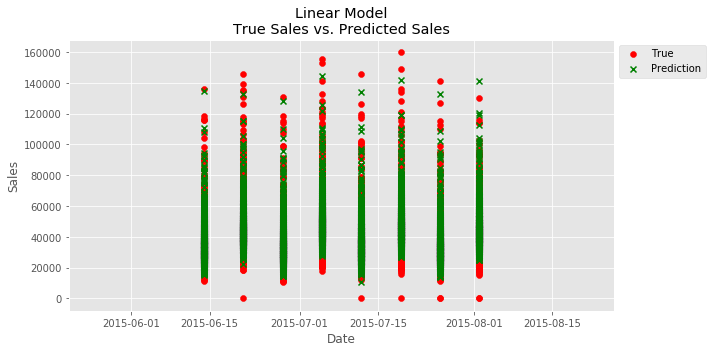

In [65]:
#create and train model
linreg = LinearRegression()
linreg.fit(X_train,y_train)

#make predictions
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

#evaluate  model
rmse_train, r2_train, _ = compute_metrics(X_test, y_train, y_pred_train)
rmse_test, r2_test, r2_adjusted = compute_metrics(X_test, y_test, y_pred_test)

print('Performance - Linear Model:')
print('---------------------------')
print(f'RMSE Train: {rmse_train:.2f}')
print(f'RMSE Test: {rmse_test:.2f}')
print(f'R^2 Train: {r2_train:.2f}')
print(f'R^2 Test: {r2_test:.2f}')
print(f'Adjusted R^2: {r2_adjusted:.2f}')

#visualize predictions of linear model
plot_true_vs_pred_sales(X_test, y_test, y_pred_test, 'Linear Model')

The selected subset of features significantly enhances sales prediction accuracy. With this optimized set of features, we aim to train a variety of models and evaluate their performance. Testing multiple models ensures that we choose the one that delivers the best results for our specific task and dataset. This approach increases the likelihood of identifying a well-fitted, robust, and generalizable model that effectively captures and predicts the underlying patterns in the data.

<br>

## Model Selection

This chapter covers the following tasks:
- Training and Evaluation of several models
- Selecting the final 
- Feature Importances

To cover a broad range of model types, we decided to compare the performance of the following models:

1. Linear Models 
    - Linear Regression
    - Lasso Regression
    - Ridge Regression
2. Decision Trees
3. Ensemble Methods
    - Random Forest
    - Gradient Boosting
4. Neural Networks
    - Multi-Layer-Perceptron
    
<br>

Let's fit the models to the previous train and test data

In [66]:
#create models with default parameter settings
linreg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state=0)
mlp = MLPRegressor(random_state=0)

#create lists to store predictions and evaluation metrics of each model
y_pred = []
rmse_train_list = []
rmse_test_list = []
r2_train_list = []
r2_test_list = []
r2_adjusted_list = []

In [67]:
#train and evaluate models

#train and test data is the same as before

models = [linreg, lasso, ridge, dt, rf, gb, mlp]
for model in models:
    #train model
    model.fit(X_train, y_train)

    #make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred.append(y_pred_test)
    
    #evaluate model
    rmse_train, r2_train, _ = compute_metrics(X_test, y_train, y_pred_train)
    rmse_test, r2_test, r2_adjusted = compute_metrics(X_test, y_test, y_pred_test)

    rmse_train_list.append(round(rmse_train,2))
    rmse_test_list.append(round(rmse_test,2))
    r2_train_list.append(round(r2_train,2))
    r2_test_list.append(round(r2_test,2))
    r2_adjusted_list.append(round(r2_adjusted,2))

#store performance metrics of each model in a dataframe
evaluation = pd.DataFrame({'Model': ['Linear', 'Lasso', 'Ridge','Decision Tree',
                                     'Random Forest', 'Gradient Boosting', 'MLP'],
                           'RMSE_Train': rmse_train_list,
                           'RMSE_Test': rmse_test_list, 
                           'R2_Train': r2_train_list,
                           'R2_Test': r2_test_list, 
                           'R2_Adjusted': r2_adjusted_list})

display(evaluation)

Model  RMSE_Train  RMSE_Test  R2_Train  R2_Test  R2_Adjusted
0             Linear     7838.09    5085.32      0.81     0.90         0.90
1              Lasso     7838.09    5085.26      0.81     0.90         0.90
2              Ridge     7838.09    5085.32      0.81     0.90         0.90
3      Decision Tree     1320.06    5423.14      0.99     0.89         0.89
4      Random Forest     1969.77    4079.42      0.99     0.94         0.94
5  Gradient Boosting     4657.83    4241.03      0.93     0.93         0.93
6                MLP     7597.96    6318.86      0.82     0.85         0.85

This is quite promising. We keep the models Decision Tree, Random Forest, Gradient Boosting and MLP and check if applying a log transformation to both the sales variable and the sales lags further improves their performance.

In [68]:
#log transfom target variable 'Sales'
train['Sales_log'] = np.log(train['Sales']+1)
test['Sales_log'] = np.log(test['Sales']+1)

#log transform lag features
lags = [8, 9, 10]
for lag in lags:
    train[f'SalesLag{lag}_log'] = np.log(train[f'SalesLag{lag}']+1)
    test[f'SalesLag{lag}_log'] = np.log(test[f'SalesLag{lag}']+1)

In [69]:
#set new features and target
FEATURES = ['Open','Promo','Month','SalesLag8_log','SalesLag9_log','SalesLag10_log']
TARGET = ['Sales_log']

#define features and target
X_train = train[FEATURES]
X_test = test[FEATURES]
y_train = train[TARGET].values
y_test = test[TARGET].values

In [70]:
#create models with default parameter settings
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state=0)
mlp = MLPRegressor(random_state=0)

#create lists to store predictions and evaluation metrics of each model
y_pred = []
rmse_train_list = []
rmse_test_list = []
r2_train_list = []
r2_test_list = []
r2_adjusted_list = []

In [71]:
#train and evaluate models

models = [dt, rf, gb, mlp]
for model in models:
    #train models
    model.fit(X_train,y_train)

    #make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred.append(y_pred_test)
    
    #evaluate models
    rmse_train, r2_train, _ = compute_metrics(X_test, y_train, y_pred_train)
    rmse_test, r2_test, r2_adjusted = compute_metrics(X_test, y_test, y_pred_test)

    rmse_train_list.append(round(rmse_train,2))
    rmse_test_list.append(round(rmse_test,2))
    r2_train_list.append(round(r2_train,2))
    r2_test_list.append(round(r2_test,2))
    r2_adjusted_list.append(round(r2_adjusted,2))

#store performance metrics of each model in a dataframe
evaluation = pd.DataFrame({'Model': ['Decision Tree','Random Forest','Gradient Boosting','MLP'],
                           'RMSE_Train': rmse_train_list,
                           'RMSE_Test': rmse_test_list, 
                           'R2_Train': r2_train_list,
                           'R2_Test': r2_test_list, 
                           'R2_Adjusted': r2_adjusted_list})

display(evaluation)

Model  RMSE_Train  RMSE_Test  R2_Train  R2_Test  R2_Adjusted
0      Decision Tree        0.03       0.12       1.0     0.93         0.93
1      Random Forest        0.05       0.09       1.0     0.96         0.96
2  Gradient Boosting        0.12       0.10       1.0     0.96         0.96
3                MLP        0.13       0.10       1.0     0.96         0.96

The log transformation of the target variable _'Sales'_ and the lag features improved the performance of all models. However, the Random Forest Model performed the best, which is why we select it as our final model. We also want to have a look at its predictions on the test set and how it weighted the features.

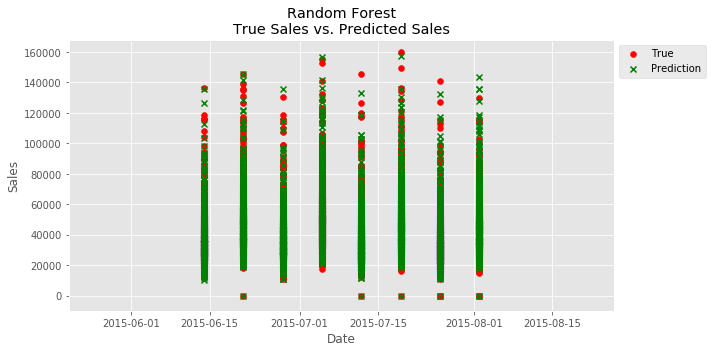

In [72]:
#visualize predictions of Random Forest
plot_true_vs_pred_sales(X_test, test['Sales'], np.exp(y_pred[1])-1, 'Random Forest')

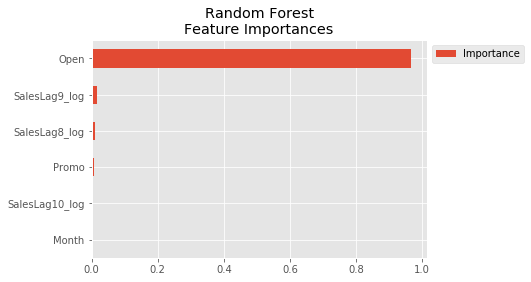

In [73]:
#feature importance
feature_importance = pd.DataFrame(data=rf.feature_importances_,
                                 index=rf.feature_names_in_,
                                 columns=['Importance'])
feature_importance.sort_values(by='Importance').plot(kind='barh', title='Random Forest\nFeature Importances')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<br>

## Predicting the Future

This chapter covers the following tasks:

- Creating future dataset
- Training final model
- Predicting future sales 

For the last step, we want to actually predict future sales. We will forecast the sales for the next eight weeks from the last date in our dataset. Therefore, we need do create a sample dataset for the next eight weeks. We start by creating the time index for each store.

In [74]:
#create sample dataset for future

#predict 8 weeks into future, starting from the week after last record in our data
last_record = data.index.max()
first_future_date = last_record + pd.DateOffset(weeks=1)
time_index = pd.date_range(start=first_future_date, periods=8, freq='W')

#repeat time index for each store
stores = data['Store'].unique()
future_data = {'Date': np.tile(time_index, len(stores)),
               'Store': np.repeat(stores, len(time_index))}

#convert to dataframe
future_df = pd.DataFrame(future_data).set_index('Date')
future_df

Store
Date             
2015-08-09      1
2015-08-16      1
2015-08-23      1
2015-08-30      1
2015-09-06      1
...           ...
2015-08-30   1115
2015-09-06   1115
2015-09-13   1115
2015-09-20   1115
2015-09-27   1115

[8920 rows x 1 columns]

We need to add the features, starting with _'Open'_ and _'Promo'_. Since we don't know these values but Rossmann store managers would, we'll assume values based on their distribution in the EDA. These assumed values should be replaced with the actual values in a real use case.

In [75]:
#add features 'Open' and 'Promo'
n = len(future_df)
future_df['Open'] = np.random.choice([6,5,0,7,4,2], size=n, p=[0.75,0.17,0.03,0.02,0.02,0.01])
future_df['Promo'] = np.random.choice([5,0], size=n, p=[0.52,0.48])

#ensure 'Promo' == 0 when 'Open' == 0
future_df.loc[future_df['Open'] == 0, 'Promo'] = 0

In [76]:
#log transform sales variable of past data
past_df = data.copy()
past_df['Sales_log'] = np.log(past_df['Sales']+1)

#add feature 'isFuture' to simplify later retrieving of past and future data
future_df['isFuture'] = True
past_df['isFuture'] = False

#concat past and future data
past_and_future = pd.concat([past_df[['Store','Open','Promo','Sales','Sales_log','isFuture']], 
                             future_df])

past_and_future

Store  Open  Promo    Sales  Sales_log  isFuture
Date                                                        
2013-01-06      1     4      0  19340.0   9.869982     False
2013-01-13      1     6      5  32952.0  10.402838     False
2013-01-20      1     6      0  25978.0  10.165044     False
2013-01-27      1     6      5  33071.0  10.406442     False
2013-02-03      1     6      0  28693.0  10.264443     False
...           ...   ...    ...      ...        ...       ...
2015-08-30   1115     6      0      NaN        NaN      True
2015-09-06   1115     5      0      NaN        NaN      True
2015-09-13   1115     2      0      NaN        NaN      True
2015-09-20   1115     6      0      NaN        NaN      True
2015-09-27   1115     5      0      NaN        NaN      True

[159445 rows x 6 columns]

Now that we have all data together, we can add the remaining features. We create a function to do that.

In [77]:
#this function adds time series and lag features to the dataframe
def add_features(df):   
    #create time series features
    df['Month'] = df.index.month

    #create lag features 
    #make sure date index is in the right order (for shifting)
    df = df.sort_values(by=['Store','Date'])
    lags = [8, 9, 10]
    for lag in lags:
        df[f'SalesLag{lag}_log'] = df.groupby('Store')['Sales_log'].shift(lag)

    return df

In [78]:
#add lag features and time series features 
past_and_future = add_features(past_and_future)
past_and_future

Store  Open  Promo    Sales  Sales_log  isFuture  Month  \
Date                                                                  
2013-01-06      1     4      0  19340.0   9.869982     False      1   
2013-01-13      1     6      5  32952.0  10.402838     False      1   
2013-01-20      1     6      0  25978.0  10.165044     False      1   
2013-01-27      1     6      5  33071.0  10.406442     False      1   
2013-02-03      1     6      0  28693.0  10.264443     False      2   
...           ...   ...    ...      ...        ...       ...    ...   
2015-08-30   1115     6      0      NaN        NaN      True      8   
2015-09-06   1115     5      0      NaN        NaN      True      9   
2015-09-13   1115     2      0      NaN        NaN      True      9   
2015-09-20   1115     6      0      NaN        NaN      True      9   
2015-09-27   1115     5      0      NaN        NaN      True      9   

            SalesLag8_log  SalesLag9_log  SalesLag10_log  
Date                                                      
2013-01-06            NaN            NaN             NaN  
2013-01-13            NaN            NaN             NaN  
2013-01-20            NaN            NaN             NaN  
2013-01-27            NaN            NaN             NaN  
2013-02-03            NaN            NaN             NaN  
...                   ...            ...             ...  
2015-08-30      10.781682      10.402959       10.834608  
2015-09-06      10.497753      10.781682       10.402959  
2015-09-13      10.734830      10.497753       10.781682  
2015-09-20      10.473421      10.734830       10.497753  
2015-09-27      10.681711      10.473421       10.734830  

[159445 rows x 10 columns]

Now, we define the past data as our training data and the remaining data is the future data we want to predict.

In [79]:
#select past data as train data and drop NaNs from shifting
past = past_and_future.query('isFuture == False').dropna()

#define features and target for train data
X_train = past[FEATURES]
y_train = past[TARGET]

#select future data and select features 
future = past_and_future.query('isFuture == True')
X_future = future[FEATURES].dropna()

Let's train our final model on all of the past data and make predictions on the future data.

In [80]:
#create and train final model
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

#predict the future
predictions = rf.predict(X_future)
#reverse log transformation and store predictions in new column
future['PredictedSales'] = np.exp(predictions)-1

We want to visualize the sale spredictions for the next eight weeks.

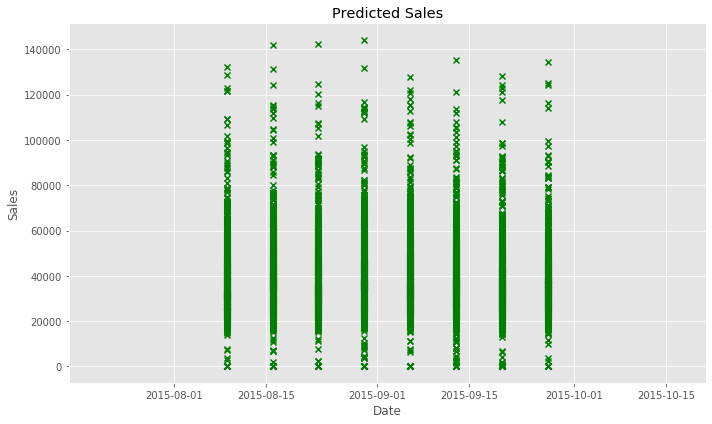

In [81]:
#visualize future predictions
plt.figure(figsize=(10,6))

#plot predicted sales
plt.scatter(future.index, future['PredictedSales'], color='g', marker='x')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

To get the predicted sales for a specific store, we create the following function.

In [82]:
def predict_store_sales(store_id):
    store_predictions = future.query(f'Store=={store_id}')['PredictedSales']
    predictions = pd.DataFrame(store_predictions).reset_index()
    return predictions

Let's have a look at the sales predictions of some stores.

In [83]:
predict_store_sales(store_id=30)

Date  PredictedSales
0 2015-08-09    20265.845920
1 2015-08-16    28479.896870
2 2015-08-23    27696.886376
3 2015-08-30    30272.354117
4 2015-09-06    27486.207305
5 2015-09-13    27939.686616
6 2015-09-20    26323.548898
7 2015-09-27    18964.070399

In [84]:
predict_store_sales(store_id=817)

Date  PredictedSales
0 2015-08-09   128482.349928
1 2015-08-16   113500.905833
2 2015-08-23   120469.686281
3 2015-08-30   114491.298311
4 2015-09-06   117827.537221
5 2015-09-13   135177.375695
6 2015-09-20   128040.414159
7 2015-09-27   125021.120479

This function saves the predictions for a specific store as csv file.

In [85]:
def save_predictions_as_csv(store_id):
    predictions = predict_store_sales(store_id)
    predictions.to_csv(f'Store{store_id}_PredictedSales.csv', index=False)

## Resume

<br>

**Sales Drivers**

Stores that are open more frequently have higher sales. Increased customer visits and promotional days boost sales. Store type 'b' attracts the most customers and generates the highest sales. Stores with extra assortment outperform those with extended or basic assortments. Sales decrease during state holidays and with Promo2 participation. Sales are lowest in January, September, and October, and peak in December, especially around Christmas. Sales are highest on the 30th, 2nd, and 4th of the month, and lowest on the 1st, 25th, and 26th.

**Strategic Recommendations**

Increase the number of store of type 'b' or convert underperforming stores to type 'b'. Expand the extra assortment to other stores. Keep stores open as much as possible, especially during peak times. Increase promotion days and reevaluate the effectiveness of Promo2. Implement initiatives like loyalty programs and targeted marketing to attract more customers. Capitalize on the December peak with special holiday deals and extended hours. Boost sales during low-sales periods in January, April, September, October, and on the 1st, 25th, and 26th of each month with targeted campaigns and promotions.

**Predictive Model**

The final model is a Random Forest Regressor. The set of input features for the model is  {_'Open'_ , _'Promo'_ , _'Month'_ , _'SalesLag8_log'_ , _'SalesLag9_log'_ , _'SalesLag10_log'_ }. Additionally, we log transformed the target variable _'Sales'_ to enhance prediction accuracy. The model achieves an R² = 0.96.

<br>

### Limitations

Some of the stores were closed for several months or more than half a year due to refurbishment, resulting in periods with no sales. The presence of zero values in the observations makes it challenging to create time series models with high accuracy. 

<br>

### Future Steps
- Additional Feature Engineering
- Cross-Validation
- Hyperparameter Tuning